# Anticipez les besoins en consommation électrique de bâtiments


Etude data - Projet 4 - Nalron (Novembre 2020) OpenClassrooms / CentraleSupélec

Traitement des données sur Jupyter Notebook (Distribution Anaconda)

Etude réalisée en langage Python

*Data source* : [Kaggle City of Seattle ](https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv) - [Open Data Seattle](https://data.seattle.gov/)

---

![Seattle](p4_image/seattle_logo.jpg)
![Seattle](p4_image/seattle_landscape.png)

**Missions pour la ville de Seattle.** Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, mon équipe et moi s’intéressons de près aux émissions des bâtiments non destinés à l’habitation.

## Problématique de la ville de Seattle
Des relevés minutieux ont été effectués par nos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous souhaitons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

On cherchera également à évaluer l’intérêt de l’"[ENERGY STAR Score](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what)" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par notre équipe.

## Missions 
- Réaliser une courte analyse exploratoire.
- Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

L’objectif est de se passer des relevés de consommation annuels (attention à la fuite de données), mais rien n'interdit d’en déduire des variables plus simples (nature et proportions des sources d’énergie utilisées). 

Attention au traitement des différentes variables, à la fois pour trouver de nouvelles informations (peut-on déduire des choses intéressantes d’une simple adresse ?) et optimiser les performances en appliquant des transformations simples aux variables (normalisation, passage au log, etc.).

Mettre en place une évaluation rigoureuse des performances de la régression, et optimiser les hyperparamètres et le choix d’algorithme de ML à l’aide d’une validation croisée.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.options.display.max_columns = 100
plt.style.use('ggplot') 
plt.rcParams.update(
    {
     'figure.figsize': (15, 10),
     'axes.labelsize': 15,
     'axes.titlesize':35,
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [3]:
df2015 = pd.read_csv('p4_00_data/2015-building-energy-benchmarking.csv')
df2016 = pd.read_csv('p4_00_data/2016-building-energy-benchmarking.csv')

In [4]:
display(df2015.head())
display(df2016.head())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5]:
display(df2015.shape)
display(df2016.shape)

(3340, 47)

(3376, 46)

In [6]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
OSEBuildingID                                                    3340 non-null int64
DataYear                                                         3340 non-null int64
BuildingType                                                     3340 non-null object
PrimaryPropertyType                                              3340 non-null object
PropertyName                                                     3340 non-null object
TaxParcelIdentificationNumber                                    3338 non-null object
Location                                                         3340 non-null object
CouncilDistrictCode                                              3340 non-null int64
Neighborhood                                                     3340 non-null object
YearBuilt                                                        3340 non-null int64
NumberofBuildings                    

In [7]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
OSEBuildingID                      3376 non-null int64
DataYear                           3376 non-null int64
BuildingType                       3376 non-null object
PrimaryPropertyType                3376 non-null object
PropertyName                       3376 non-null object
Address                            3376 non-null object
City                               3376 non-null object
State                              3376 non-null object
ZipCode                            3360 non-null float64
TaxParcelIdentificationNumber      3376 non-null object
CouncilDistrictCode                3376 non-null int64
Neighborhood                       3376 non-null object
Latitude                           3376 non-null float64
Longitude                          3376 non-null float64
YearBuilt                          3376 non-null int64
NumberofBuildings                  3368 non-null float

In [8]:
display(df2015.duplicated(subset=['OSEBuildingID', 'TaxParcelIdentificationNumber'], keep=False).sum())
display(df2016.duplicated(subset=['OSEBuildingID', 'TaxParcelIdentificationNumber'], keep=False).sum())

0

0

In [9]:
display(df2015.isna().sum().sum()/df2015.size*100)
display(df2016.isna().sum().sum()/df2016.size*100)

16.888775640208944

12.847723057902327

In [10]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

In [11]:
nan_check(df2015)

,Total,%
Comment,3327,99.61
Outlier,3256,97.49
YearsENERGYSTARCertified,3230,96.71
City Council Districts,3127,93.62
2010 Census Tracts,3116,93.29
ThirdLargestPropertyUseTypeGFA,2780,83.23
ThirdLargestPropertyUseType,2780,83.23
SecondLargestPropertyUseTypeGFA,1781,53.32
SecondLargestPropertyUseType,1781,53.32
ENERGYSTARScore,780,23.35


In [12]:
nan_check(df2016)

,Total,%
Comments,3376,100.00
Outlier,3344,99.05
YearsENERGYSTARCertified,3257,96.48
ThirdLargestPropertyUseType,2780,82.35
ThirdLargestPropertyUseTypeGFA,2780,82.35
SecondLargestPropertyUseType,1697,50.27
SecondLargestPropertyUseTypeGFA,1697,50.27
ENERGYSTARScore,843,24.97
LargestPropertyUseTypeGFA,20,0.59
LargestPropertyUseType,20,0.59


In [13]:
df2015.columns.difference(df2016.columns)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')

In [14]:
df2016.columns.difference(df2015.columns)

Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')

In [15]:
from ast import literal_eval
df2015["Location"] = df2015["Location"].apply(literal_eval)
df2015["Latitude"] = df2015["Location"].apply(lambda x: x["latitude"]).astype('float64')
df2015["Longitude"] = df2015["Location"].apply(lambda x: x["longitude"]).astype('float64')
df2015["human_address"] = df2015["Location"].apply(lambda x: x["human_address"])

df2015["human_address"] = df2015["human_address"].apply(literal_eval)
df2015["Address"] = df2015["human_address"].apply(lambda x: x["address"])
df2015["City"] = df2015["human_address"].apply(lambda x: x["city"])
df2015["State"] = df2015["human_address"].apply(lambda x: x["state"])
df2015["ZipCode"] = df2015["human_address"].apply(lambda x: x["zip"]).astype('int64')

df2015.drop(["Location", "human_address"], axis=1, inplace=True)

In [16]:
df2016.rename(columns={"Comments": "Comment"}, inplace=True)

df2015.rename(columns={
    "GHGEmissions(MetricTonsCO2e)": "TotalGHGEmissions",
    "GHGEmissionsIntensity(kgCO2e/ft2)": "GHGEmissionsIntensity"}, inplace=True)

In [17]:
df2016.columns.difference(df2015.columns)

Index([], dtype='object')

In [18]:
df2015[df2015.columns.difference(df2016.columns)]

,2010 Census Tracts,City Council Districts,OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,Zip Codes
0,NaN,NaN,0.0,31.0,14.0,18081
1,NaN,NaN,0.0,31.0,14.0,18081
2,NaN,NaN,0.0,31.0,56.0,18081
3,NaN,NaN,0.0,31.0,56.0,18081
4,NaN,NaN,0.0,31.0,56.0,19576
...,...,...,...,...,...,...
3335,NaN,NaN,0.0,16.0,26.0,18379
3336,NaN,NaN,0.0,38.0,60.0,18383
3337,NaN,NaN,0.0,7.0,56.0,19576
3338,NaN,NaN,0.0,48.0,55.0,18792


Après quelques recherches complémentaires sur le site https://data-seattlecitygis.opendata.arcgis.com/ \
ces 5 variables n'ont pas de valeur ajoutée dans le traitement de notre problématique. Ces caractéristiques ne sont également plus présentes dès 2016, il est nécessaire de supprimer ces données de l'échantillon.

In [19]:
df2015.drop(df2015.columns.difference(df2016.columns), axis=1, inplace=True)

In [20]:
df = pd.concat([df2015, df2016], join='inner').drop_duplicates().reset_index(drop=True)
df.shape

(6716, 46)

In [21]:
df.isna().sum().sum()/df.size*100

13.014669705052178

In [22]:
display(df.duplicated(subset=['TaxParcelIdentificationNumber'], keep=False).sum())
display(df.duplicated(keep=False).sum())

5798

0

Il est normal de retrouver en quasi majorité les bâtiments de 2015 en 2016, ce qui explique le chiffre obtenu. Ceci étant, rappelons que les données selon l'année n'a aucun doublon, cela a pu être vérifié en début de traitement.

In [23]:
nan_check(df)

,Total,%
Comment,6703,99.81
Outlier,6600,98.27
YearsENERGYSTARCertified,6487,96.59
ThirdLargestPropertyUseType,5560,82.79
ThirdLargestPropertyUseTypeGFA,5560,82.79
SecondLargestPropertyUseTypeGFA,3478,51.79
SecondLargestPropertyUseType,3478,51.79
ENERGYSTARScore,1623,24.17
LargestPropertyUseType,156,2.32
LargestPropertyUseTypeGFA,156,2.32


Notons que le seuil de 50% (données manquantes) est pertinent pour effectuer une première sélection de variables. Au-dessus il ressort clairement que les features ne sont pas explicatives dans le contexte de l'étude menée. 

Ceci étant, la variable "Outlier" pourrait-être utile pour exclure les observations plus influentes. **Voyons comment exclure ces valeurs atypiques.**

In [24]:
display(df['Outlier'].unique())
display(df[df['Outlier'].isin(['High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'])])

array([nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'],
      dtype=object)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comment,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2769023.0,20019.000000,2001894.0,1936.34,31.38,No,NaN,Compliant,High Outlier,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA,98101.0
62,87,2015,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),2518400005,1,SOUTHWEST,1948,1.0,2.0,53352,0,53352,K-12 School,K-12 School,53352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Under construction starting 6/2013 (old buildi...,Compliant,Low Outlier,47.509354,-122.378222,3701 SW 104TH ST,SEATTLE,WA,98146.0
228,350,2015,NonResidential,Large Office,SECOND AND SPRING BUILDING,942000045,7,DOWNTOWN,1958,1.0,6.0,172842,25920,146922,"Data Center, Office, Parking",Office,92310.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,312.100000,315.100000,955.200000,958.300000,4.109208e+07,4.147840e+07,0.0,1.158346e+07,39524406.0,15693.000000,1569312.0,358.88,1.09,No,NaN,Compliant,High Outlier,47.606016,-122.335696,1100 2ND AVE,SEATTLE,WA,98101.0
322,457,2015,NonResidential,Large Office,1441 LAKE UNION CENTER,2264501110,4,LAKE UNION,2001,1.0,3.0,103697,47656,56041,Office,Office,63199.0,NaN,NaN,NaN,NaN,NaN,1.0,242.500000,252.400000,535.600000,535.200000,1.532478e+07,1.595039e+07,0.0,2.489958e+06,8496089.0,68290.000000,6829040.0,421.92,3.72,No,NaN,Compliant,High Outlier,47.647797,-122.339264,1441 N 34TH ST,SEATTLE,WA,98103.0
387,539,2015,NonResidential,Retail Store,UNIVERSITY CENTER,5335200380,4,NORTHEAST,1987,1.0,2.0,69492,0,69492,"Other, Retail Store",Retail Store,69800.0,Other,0.0,NaN,NaN,NaN,100.0,5.900000,5.900000,18.400000,18.400000,4.085130e+05,4.085130e+05,0.0,1.197280e+05,408530.0,0.000000,0.0,2.85,0.02,Yes,NaN,Compliant,Low Outlier,47.661726,-122.317961,4500 9TH AVE NE,SEATTLE,WA,98105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,28735,2016,Multifamily LR (1-4),Low-Rise Multifamily,Building 4,8632880000,5,NORTH,2008,1.0,4.0,46725,0,46725,Multifamily Housing,Multifamily Housing,102522.0,NaN,NaN,NaN,NaN,NaN,1.0,131.300003,140.100006,218.600006,230.899994,1.345922e+07,1.436022e+07,0.0,1.161543e+06,3963184.0,94960.359380,9496036.0,531.96,11.38,False,NaN,Non-Compliant,High outlier,47.701880,-122.324590,400 NE Thornton Place,Seattle,WA,98125.0
6432,29390,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Commodore Duchess Apartments,1142002395,4,NORTHEAST,1925,1.0,8.0,97923,0,97923,Multifamily Housing,Multifamily Housing,70143.0,Office,220.0,NaN,NaN,NaN,5.0,147.500000,158.199997,220.600006,233.500000,1.034303e+07,1.109660e+07,8704596.0,4.597700e+05,1568735.0,696.960022,69696.0,686.53,7.01,False,NaN,Non-Compliant,High outlier,47.655700,-122.312440,4005 15th Ave NE,Seattle,WA,98105.0
6492,43948,2016,Nonresidential COS,Other,Georgetown Steamplant,0000000000,2,GREATER DUWAMISH,1906,1.0,2.0,39212,0,39212,Other,Other,39212.0,NaN,NaN,NaN,NaN,NaN,NaN,1.800000,1.800000,5.800000,5.800000,7.237040e

In [25]:
df = df[df['Outlier'].isna()]
df.shape

(6600, 46)

In [26]:
df = df[list(nan_check(df)[nan_check(df)['%'] < 50].index)]
df.shape

(6600, 39)

### Seattle comparatif rapide par 3 indicateurs "Buildings, surfaces et taux de conformité"

In [27]:
#NumberofBuildings
'''Number of buildings included in the property's report. In cases where a property is reporting as a campus, 
multiple buildings may be included in one report.'''
print("Number of buildings in 2015 : " + str(df[df['DataYear'] == 2015]['NumberofBuildings'].count()))
print("Number of buildings in 2016 : " + str(df[df['DataYear'] == 2016]['NumberofBuildings'].count()))

Number of buildings in 2015 : 3256
Number of buildings in 2016 : 3336


In [28]:
#PropertyGFABuilding(s)
'''Total floor space in square feet between the outside surfaces of a building’s enclosing walls. 
This includes all areas inside the building(s), such as tenant space, common areas, stairwells, 
basements, storage, etc.'''
print("Million square feet in 2015 : " + 
      str(int((df[df['DataYear'] == 2015]['PropertyGFABuilding(s)'].sum()/1e6))) + ' (24 Millions M2)')
print("Million square feet in 2016 : " + 
      str(int((df[df['DataYear'] == 2016]['PropertyGFABuilding(s)'].sum()/1e6))) + ' (27 Millions M2)')

Million square feet in 2015 : 260 (24 Millions M2)
Million square feet in 2016 : 291 (27 Millions M2)


In [29]:
#ComplianceStatus
'''Whether a property has met energy benchmarking requirements for the current reporting year.'''
print("Compliance Rate 2015 : " + str(round(df[(df['DataYear'] == 2015) & 
   (df['ComplianceStatus'] == 'Compliant')]['ComplianceStatus'].count()/len(df[df['DataYear'] == 2015])*100, 1)))
print("Compliance Rate 2016 : " + str(round(df[(df['DataYear'] == 2016) & 
   (df['ComplianceStatus'] == 'Compliant')]['ComplianceStatus'].count()/len(df[df['DataYear'] == 2016])*100, 1)))

Compliance Rate 2015 : 99.9
Compliance Rate 2016 : 96.0


In [30]:
df = df[df['ComplianceStatus'] == "Compliant"]

### Analyse du choix des variables clés
Rappelons que l'échantillon actuel se caractérise par 39 variables restantes, suite aux premières opérations effectuées. Mais sont-elles toutes essentielles dans l'analyse de notre problématique? Avons-nous des redondances? Corrélations? Un choix métier est nécessaire pour traiter comme il se doit ces relevés.

In [31]:
def color_corr_red(val):
    """color: red for correlationvalues , black otherwise."""
    color = 'red' if val >= 0.75 else 'black'
    return 'color: %s' % color

df.corr(method='pearson').style.applymap(color_corr_red)

,ENERGYSTARScore,LargestPropertyUseTypeGFA,SourceEUI(kBtu/sf),SteamUse(kBtu),SourceEUIWN(kBtu/sf),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ZipCode,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu),NumberofFloors,NumberofBuildings,Longitude,Latitude,PropertyGFABuilding(s),DataYear,CouncilDistrictCode,YearBuilt,PropertyGFATotal,PropertyGFAParking,OSEBuildingID
ENERGYSTARScore,1,0.0587768,-0.311784,-0.0358713,-0.319907,-0.0519091,-0.0519091,-0.0978902,-0.0978903,-0.0917714,-0.248068,-0.00149455,-0.339333,-0.347137,-0.083739,-0.0809802,0.0250554,-0.00836466,-0.0461107,0.0993544,0.0574835,-0.0169101,0.084048,0.0230672,0.0660726,0.0720229,0.0780032
LargestPropertyUseTypeGFA,0.0587768,1,0.0753557,0.444091,0.0506073,0.831815,0.831813,0.262554,0.262554,0.580931,0.0560946,-0.0571423,0.0675465,0.0428839,0.491246,0.805357,0.417879,0.660742,0.0272517,-0.0246516,0.971449,0.0124085,0.0840553,0.096748,0.967543,0.384312,-0.15428
SourceEUI(kBtu/sf),-0.311784,0.0753557,1,0.0979519,0.995501,0.382413,0.382416,0.204926,0.204926,0.257352,0.522578,-0.0527536,0.94782,0.931596,0.416353,0.349255,0.0364742,0.0291008,0.0232763,-0.00325633,0.0845921,0.0206852,0.0619826,0.0503333,0.101206,0.127325,-0.16567
SteamUse(kBtu),-0.0358713,0.444091,0.0979519,1,0.0887267,0.502766,0.502766,0.0360312,0.0360312,0.710449,0.199993,-0.0401898,0.114865,0.105614,0.516187,0.586282,0.0842878,0.280015,0.017458,-0.019884,0.411216,0.00553139,0.0079702,-0.0086695,0.382304,0.0128654,-0.0496885
SourceEUIWN(kBtu/sf),-0.319907,0.0506073,0.995501,0.0887267,1,0.358476,0.358479,0.204304,0.204304,0.247107,0.529818,-0.0545474,0.946491,0.939431,0.413461,0.327787,0.028813,0.00960817,0.0229172,-0.00324776,0.0596583,0.010825,0.0585902,0.0447849,0.0767198,0.11933,-0.160342
Electricity(kWh),-0.0519091,0.831815,0.382413,0.502766,0.358476,1,1,0.332594,0.332594,0.691645,0.176977,-0.0526843,0.334103,0.305039,0.69861,0.952333,0.306481,0.615182,0.0247184,-0.0265255,0.820599,0.013576,0.0704538,0.0631491,0.808609,0.278244,-0.180547
Electricity(kBtu),-0.0519091,0.831813,0.382416,0.502766,0.358479,1,1,0.332596,0.332596,0.691646,0.176977,-0.0526849,0.334106,0.305041,0.698615,0.952333,0.306484,0.615176,0.0247185,-0.0265258,0.820597,0.0135702,0.0704545,0.06315,0.808608,0.278247,-0.180549
NaturalGas(therms),-0.0978902,0.262554,0.204926,0.0360312,0.204304,0.332594,0.332596,1,1,0.713511,0.467018,-0.032046,0.291984,0.294996,0.69353,0.549268,0.0791699,0.0961211,0.0332776,-0.0128055,0.245207,0.0129487,0.0122698,0.0245995,0.244609,0.0996391,-0.0886848
NaturalGas(kBtu),-0.0978903,0.262554,0.204926,0.0360312,0.204304,0.332594,0.332596,1,1,0.713511,0.467018,-0.0320459,0.291984,0.294996,0.69353,0.549268,0.0791698,0.096121,0.0332776,-0.0128055,0.245207,0.0129487,0.0122698,0.0245995,0.244609,0.099639,-0.0886848
TotalGHGEmissions,-0.0917714,0.580931,0.257352,0.710449,0.247107,0.691645,0.691646,0.713511,0.713511,1,0.446379,-0.0537817,0.313637,0.30474,0.872809,0.869623,0.155984,0.339515,0.0359208,-0.0247664,0.54925,0.0139443,0.02531,0.0218468,0.529452,0.121184,-0.118462


In [32]:
[c for c in df.corr() if any(df.corr()[c] >  0.75)]

['ENERGYSTARScore',
 'LargestPropertyUseTypeGFA',
 'SourceEUI(kBtu/sf)',
 'SteamUse(kBtu)',
 'SourceEUIWN(kBtu/sf)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'ZipCode',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUseWN(kBtu)',
 'SiteEnergyUse(kBtu)',
 'NumberofFloors',
 'NumberofBuildings',
 'Longitude',
 'Latitude',
 'PropertyGFABuilding(s)',
 'DataYear',
 'CouncilDistrictCode',
 'YearBuilt',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'OSEBuildingID']

**Notons que pour certaines variables, dans un contexte métier mais également statistique, un choix devra être fait. Concrètement, il n'y a pas d'intérêt d'analyser deux variables similaires comme 'Electricity(kWh)', 'Electricity(kBtu)' ou encore 'PropertyGFAParking', 'PropertyGFABuilding(s)' qui peuvent se résumer par 'PropertyGFATotal'...** Voyons comment traiter nos variables métiers.

### Quelles métriques retenir pour l'étude? Comment répondre à la question du risque de fuite des données?

In [33]:
df.columns

Index(['ENERGYSTARScore', 'LargestPropertyUseTypeGFA',
       'LargestPropertyUseType', 'ListOfAllPropertyUseTypes',
       'SourceEUI(kBtu/sf)', 'SteamUse(kBtu)', 'SourceEUIWN(kBtu/sf)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'ZipCode', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)', 'NumberofFloors',
       'NumberofBuildings', 'TaxParcelIdentificationNumber', 'DefaultData',
       'PrimaryPropertyType', 'State', 'City', 'Address', 'Longitude',
       'Latitude', 'BuildingType', 'ComplianceStatus',
       'PropertyGFABuilding(s)', 'PropertyName', 'DataYear',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'PropertyGFATotal',
       'PropertyGFAParking', 'OSEBuildingID'],
      dtype='object')

Comme l'atteste le shéma suivant expliquant la mesure **EUI**, l'échantillon dispose de variables synthétiques.\
Identifions ces variables et utilisons les pour la suite de l'analyse.

![](p4_image/metrics.png)
*Source : http://www.seattle.gov/Documents/Departments/OSE/EBR-2013-report.pdf*

In [34]:
df.drop(columns=['SteamUse(kBtu)', 'Electricity(kBtu)', 'Electricity(kWh)', 
                 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)',  
                 'NaturalGas(kBtu)', 'NaturalGas(therms)', 
                 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
                 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'PropertyGFAParking',
                 'GHGEmissionsIntensity'], inplace=True)

In [35]:
df.head()

,ENERGYSTARScore,LargestPropertyUseType,ListOfAllPropertyUseTypes,TotalGHGEmissions,ZipCode,SiteEnergyUse(kBtu),NumberofFloors,NumberofBuildings,TaxParcelIdentificationNumber,DefaultData,PrimaryPropertyType,State,City,Address,Longitude,Latitude,BuildingType,ComplianceStatus,PropertyName,DataYear,CouncilDistrictCode,Neighborhood,YearBuilt,PropertyGFATotal,OSEBuildingID
0,65.0,Hotel,Hotel,249.43,98101.0,6981428.0,12.0,1.0,659000030,No,Hotel,WA,SEATTLE,405 OLIVE WAY,-122.337997,47.612190,NonResidential,Compliant,MAYFLOWER PARK HOTEL,2015,7,DOWNTOWN,1927,88434,1
1,51.0,Hotel,"Hotel, Parking, Restaurant",263.51,98101.0,8354235.0,11.0,1.0,659000220,No,Hotel,WA,SEATTLE,724 PINE ST,-122.333358,47.613106,NonResidential,Compliant,PARAMOUNT HOTEL,2015,7,DOWNTOWN,1996,103566,2
2,18.0,Hotel,"Hotel, Parking, Swimming Pool",2061.48,98101.0,73130656.0,41.0,1.0,659000475,Yes,Hotel,WA,SEATTLE,1900 5TH AVE,-122.337699,47.613349,NonResidential,Compliant,WESTIN HOTEL,2015,7,DOWNTOWN,1969,961990,3
4,67.0,Hotel,"Hotel, Parking, Swimming Pool",507.70,98121.0,14829099.0,18.0,1.0,659000970,No,Hotel,WA,SEATTLE,401 LENORA ST,-122.340924,47.613754,NonResidential,Compliant,WARWICK SEATTLE HOTEL,2015,7,DOWNTOWN,1980,119890,8
5,NaN,Police Station,Police Station,304.62,98101.0,12051984.0,2.0,1.0,660000560,No,Other,WA,SEATTLE,810 VIRGINIA ST,-122.336764,47.616439,Nonresidential COS,Compliant,WEST PRECINCT (SEATTLE POLICE),2015,7,DOWNTOWN,1999,97288,9


In [36]:
display(df['LargestPropertyUseType'].unique())
display(df['ListOfAllPropertyUseTypes'].unique())

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', nan, 'Library',
       'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Distribution Center', 'Parking',
       'Worship Facility', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient',
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Other - Recreation', 'Lifestyle Center',
       'Other - Public S

array(['Hotel', 'Hotel, Parking, Restaurant',
       'Hotel, Parking, Swimming Pool', 'Police Station',
       'Other - Entertainment/Public Assembly', 'Multifamily Housing',
       nan, 'Hotel, Parking', 'Data Center, Library, Parking',
       'Fitness Center/Health Club/Gym, Office, Swimming Pool',
       'Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership',
       'Hotel, Parking, Retail Store, Swimming Pool',
       'K-12 School, Multifamily Housing, Office, Other - Entertainment/Public Assembly',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse, Office',
       'Office, Other - Education',
       'Office, Self-Storage Facility, Vocational School',
       'Data Center, Office, Retail Store',
       'Non-Refrigerated Warehouse, Other, Retail Store',
       'Office, Retail Store',
       'Office, Other - Entertainment/Public Assembly, Restaurant',
   

La variable catégorielle 'LargestPropertyUseType' est plus significative et facile à exploiter. Les modalités généralisent mieux le type d'usage, elles n'affichent que l'usage principal, les zones aux plus grandes surfaces… (The name of the Property Type (ex: Office) that has the largest Gross Floor Area (GFA) for that property). 

In [37]:
df.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

In [38]:
display(df['TaxParcelIdentificationNumber'][:5].unique())
display(df['PropertyName'][:5].unique())
display(df['Address'][:5].unique())
display(df['ZipCode'][:5].unique())
display(df['State'][:5].unique())
display(df['City'][:5].unique())
display(df['DefaultData'][:5].unique())

array(['659000030', '659000220', '659000475', '659000970', '660000560'],
      dtype=object)

array(['MAYFLOWER PARK HOTEL', 'PARAMOUNT HOTEL', 'WESTIN HOTEL',
       'WARWICK SEATTLE HOTEL', 'WEST PRECINCT (SEATTLE POLICE)'],
      dtype=object)

array(['405 OLIVE WAY', '724 PINE ST', '1900 5TH AVE', '401 LENORA ST',
       '810 VIRGINIA ST'], dtype=object)

array([98101., 98121.])

array(['WA'], dtype=object)

array(['SEATTLE'], dtype=object)

array(['No', 'Yes'], dtype=object)

In [39]:
df.drop(columns=['TaxParcelIdentificationNumber', 'State', 'City', 'ZipCode',
                 'PropertyName', 'Address', 'DefaultData'],inplace=True)

In [40]:
df.drop(columns=['ComplianceStatus'], inplace=True)

In [41]:
df.drop(columns=['OSEBuildingID'], inplace=True)

### Identification des valeurs cibles 
**Rappelons la problématique de la ville de Seattle**, prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées. L'évaluation de l’intérêt de l’**"ENERGY STAR Score"** pour la prédiction d’émissions, car fastidieux à calculer.

In [42]:
df = df.loc[df['TotalGHGEmissions'] > 0, :].reset_index(drop=True)
df.shape

(6450, 15)

Le résultat est satisfaisant, les variables explicatives ainsi que les targets sont totalement exploitables.

In [43]:
numerical = df.select_dtypes(exclude=['object']).columns
categorical = df.select_dtypes(exclude=['int', 'float']).columns

display(numerical)
display(categorical)

Index(['ENERGYSTARScore', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)',
       'NumberofFloors', 'NumberofBuildings', 'Longitude', 'Latitude',
       'DataYear', 'CouncilDistrictCode', 'YearBuilt', 'PropertyGFATotal'],
      dtype='object')

Index(['LargestPropertyUseType', 'PrimaryPropertyType', 'BuildingType',
       'Neighborhood'],
      dtype='object')

## Analyse des principales métriques

In [44]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
ENERGYSTARScore,4887.0,6.771619e+01,2.674852e+01,1.000000,52.000000,7.500000e+01,9.000000e+01,1.000000e+02
TotalGHGEmissions,6450.0,1.154833e+02,4.860752e+02,0.080000,9.522500,3.309000e+01,9.030250e+01,1.687098e+04
SiteEnergyUse(kBtu),6450.0,5.242291e+06,1.843106e+07,11441.000000,930482.500000,1.787052e+06,4.140252e+06,8.739237e+08
NumberofFloors,6442.0,4.746042e+00,5.545013e+00,0.000000,2.000000,4.000000e+00,5.000000e+00,9.900000e+01
NumberofBuildings,6450.0,1.073643e+00,1.624171e+00,0.000000,1.000000,1.000000e+00,1.000000e+00,1.110000e+02
Longitude,6450.0,-1.223350e+02,2.686159e-02,-122.414250,-122.350455,-1.223326e+02,-1.223199e+02,-1.222205e+02
Latitude,6450.0,4.762439e+01,4.760876e-02,47.499331,47.600411,4.761890e+01,4.765717e+01,4.773387e+01
DataYear,6450.0,2.015497e+03,5.000282e-01,2015.000000,2015.000000,2.015000e+03,2.016000e+03,2.016000e+03
CouncilDistrictCode,6450.0,4.460310e+00,2.119925e+00,1.000000,3.000000,4.000000e+00,7.000000e+00,7.000000e+00
YearBuilt,6450.0,1.968360e+03,3.296413e+01,1900.000000,1948.000000,1.975000e+03,1.997000e+03,2.015000e+03


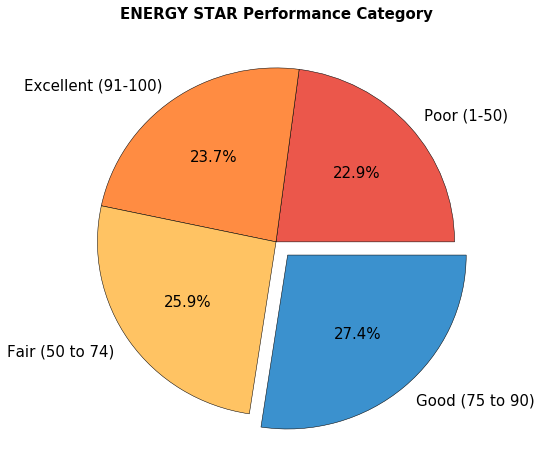

In [45]:
energy = pd.cut(df['ENERGYSTARScore'], [1, 50, 74, 90, 100])  
count = energy.value_counts().sort_values()
category = ['Poor (1-50)', 'Excellent (91-100)', 'Fair (50 to 74)', 'Good (75 to 90)']

fig1, ax = plt.subplots(figsize=(8,8))
ax.pie(count, 
       labels=category,
       explode = [0, 0, 0, .1],
       autopct='%1.1f%%',
       colors = ["#eb574b", "#ff8c42", "#ffc363", "#3b91ce"],
       wedgeprops = {"ec": "k"}, 
       textprops = {"fontsize": 15}) 
ax.set_title('ENERGY STAR Performance Category', {"fontsize": 15})
plt.savefig('p4_00_graphic/ENERGYSTARScore_category.png')
plt.show()

Les dénominations des tranches ont été prises sur le site Seattle.gov. **Les valeurs identifiées ci-dessus sont en effet représentatives d'une homogénéité certaine des performances énergétiques de la ville.**

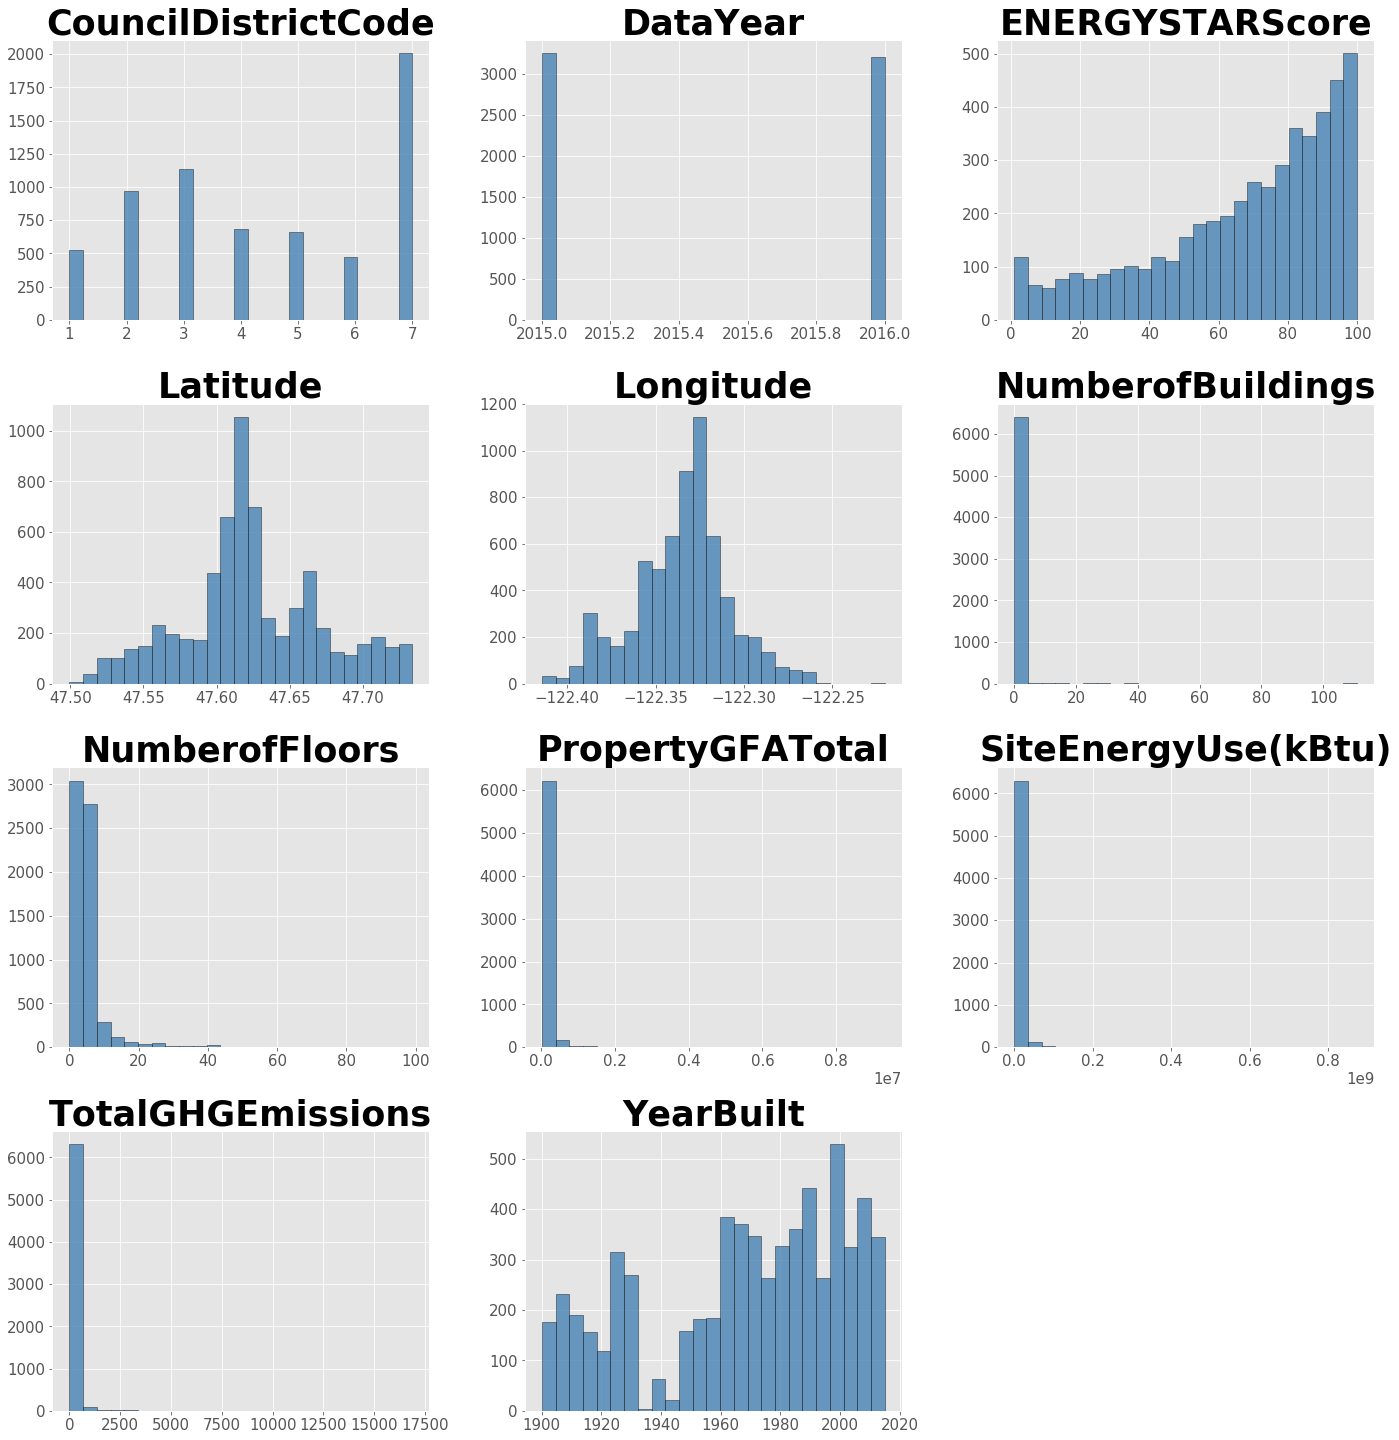

In [46]:
df[numerical].hist(bins=25, figsize=(20, 40), layout=(8, 3), 
                   alpha=.8, color='#4682b4', ec="k")
plt.tight_layout()

Des différences d'échelle sont visibles, ce qui est normal puisque les variables représentent des aspects différents des bâtiments. Ceci étant, dans une perspective de modélisation, il sera nécessaire de transformer les variables, à commencer par nos variables cibles.

### Description des 2 variables cibles
Histogramme, boxplot et statistiques descriptives.

In [47]:
numerical_target = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
df[numerical_target].describe()

,SiteEnergyUse(kBtu),TotalGHGEmissions
count,6.450000e+03,6450.000000
mean,5.242291e+06,115.483327
std,1.843106e+07,486.075236
min,1.144100e+04,0.080000
25%,9.304825e+05,9.522500
50%,1.787052e+06,33.090000
75%,4.140252e+06,90.302500
max,8.739237e+08,16870.980000


In [48]:
from sklearn.preprocessing import power_transform
df['SiteEnergyUse(kBtu)_trans'] = power_transform(df[numerical_target], method='box-cox')[:,0]
df['TotalGHGEmissions_trans'] = power_transform(df[numerical_target], method='box-cox')[:,1]

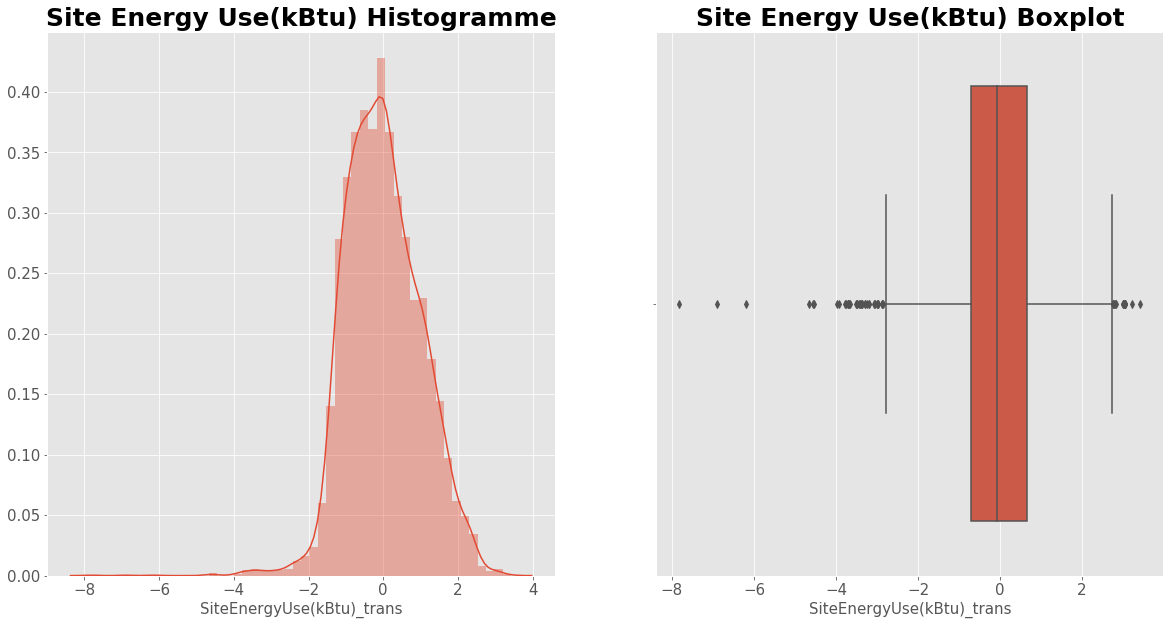

count    6.450000e+03
mean     3.831010e-15
std      1.000078e+00
min     -7.822055e+00
25%     -7.111771e-01
50%     -6.148719e-02
75%      6.691154e-01
max      3.423598e+00
Name: SiteEnergyUse(kBtu)_trans, dtype: float64


In [49]:
#SiteEnergyUse(kBtu)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.distplot(df['SiteEnergyUse(kBtu)_trans'])
plt.title('Site Energy Use(kBtu) Histogramme', fontsize=25)

plt.subplot(122)
sns.boxplot(df['SiteEnergyUse(kBtu)_trans'])
plt.title('Site Energy Use(kBtu) Boxplot', fontsize=25)

plt.savefig('p4_00_graphic/energy_trans_boxcox.png')
plt.show()

print(df['SiteEnergyUse(kBtu)_trans'].describe())

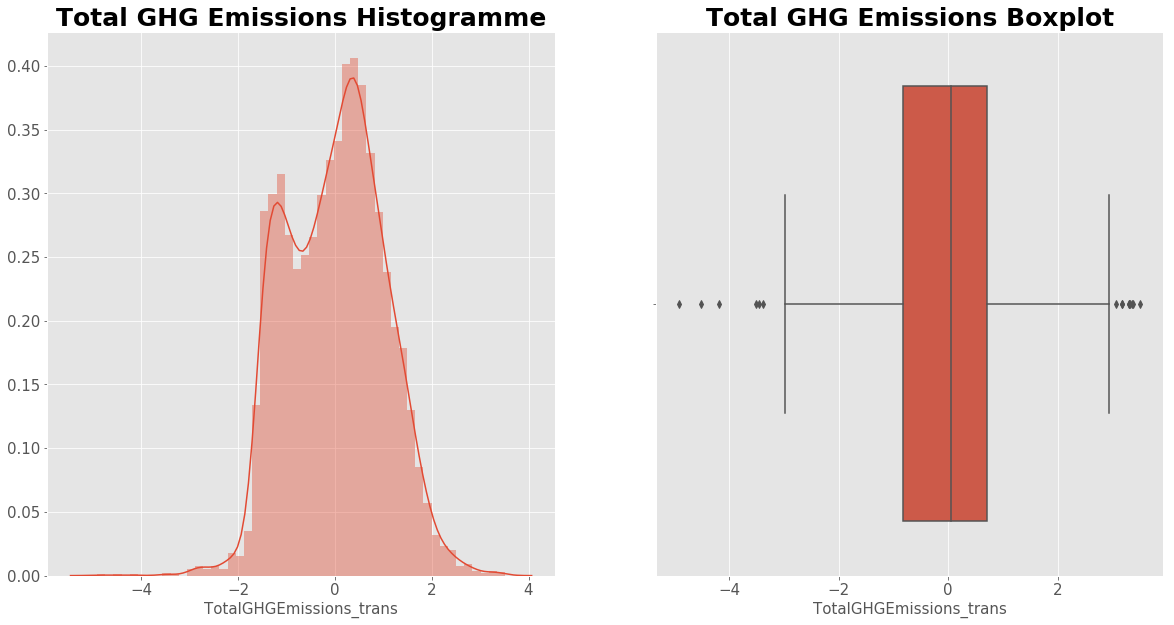

count    6.450000e+03
mean    -3.868998e-17
std      1.000078e+00
min     -4.916797e+00
25%     -8.167542e-01
50%      5.839794e-02
75%      7.139601e-01
max      3.515597e+00
Name: TotalGHGEmissions_trans, dtype: float64


In [50]:
#TotalGHGEmissions
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.distplot(df['TotalGHGEmissions_trans'])
plt.title('Total GHG Emissions Histogramme', fontsize=25)

plt.subplot(122)
sns.boxplot(df['TotalGHGEmissions_trans'])
plt.title('Total GHG Emissions Boxplot', fontsize=25)

plt.savefig('p4_00_graphic/emissions_trans_boxcox.png')
plt.show()

print(df['TotalGHGEmissions_trans'].describe())

Notons que les 2 Target ne semblent pas suivre une loi normale, en effet les distributions respectives sont plus étalées du fait d'avoir une grande disparité dans les métriques. Cela semble normal qu'une grande ville comme celle de Seattle peut très certainement être aménagée par une large diversité de bâtiments. **Voyons comment décrire son aménagement urbain.**

In [51]:
numerical_target = ['SiteEnergyUse(kBtu)_trans', 'TotalGHGEmissions_trans']

In [52]:
#L'échantillon a-t-il encore des données manquantes pouvant pénaliser les modélisations?
df.isna().sum()

ENERGYSTARScore              1563
LargestPropertyUseType        142
TotalGHGEmissions               0
SiteEnergyUse(kBtu)             0
NumberofFloors                  8
NumberofBuildings               0
PrimaryPropertyType             0
Longitude                       0
Latitude                        0
BuildingType                    0
DataYear                        0
CouncilDistrictCode             0
Neighborhood                    0
YearBuilt                       0
PropertyGFATotal                0
SiteEnergyUse(kBtu)_trans       0
TotalGHGEmissions_trans         0
dtype: int64

La variable 'ENERGYSTARScore' peut être traitée par différentes méthodes. Soit en supprimant les observations manquantes, soit par imputation par valeur fixe (moyenne, médiane, valeur la plus fréquente…), soit par Régression linéaire, ou par les valeurs les plus proches. Ici, le choix de la méthode KNN (k- plus proches voisins) est choisie pour estimer ces 1530 valeurs manquantes. 

Dans l'immédiat, les quelques valeurs manquantes sur les variables 'LargestPropertyUseType', 'NumberofFloors' sont supprimées de l'échantillon. 

In [53]:
df = df.dropna(subset=['LargestPropertyUseType', 'NumberofFloors'], axis=0).reset_index(drop='all')
display(df.shape)
display(nan_check(df))

(6300, 17)

,Total,%
ENERGYSTARScore,1530,24.29
BuildingType,0,0.00
SiteEnergyUse(kBtu)_trans,0,0.00
PropertyGFATotal,0,0.00
YearBuilt,0,0.00
Neighborhood,0,0.00
CouncilDistrictCode,0,0.00
DataYear,0,0.00
Latitude,0,0.00
LargestPropertyUseType,0,0.00


In [54]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

sample_imput_energyscore = pd.DataFrame(imputer.fit_transform(df.select_dtypes(exclude='object')))
df['ENERGYSTARScore'] = sample_imput_energyscore[0]
df.isna().sum()

ENERGYSTARScore              0
LargestPropertyUseType       0
TotalGHGEmissions            0
SiteEnergyUse(kBtu)          0
NumberofFloors               0
NumberofBuildings            0
PrimaryPropertyType          0
Longitude                    0
Latitude                     0
BuildingType                 0
DataYear                     0
CouncilDistrictCode          0
Neighborhood                 0
YearBuilt                    0
PropertyGFATotal             0
SiteEnergyUse(kBtu)_trans    0
TotalGHGEmissions_trans      0
dtype: int64

### Analyse des principales caractéristiques des Buildings

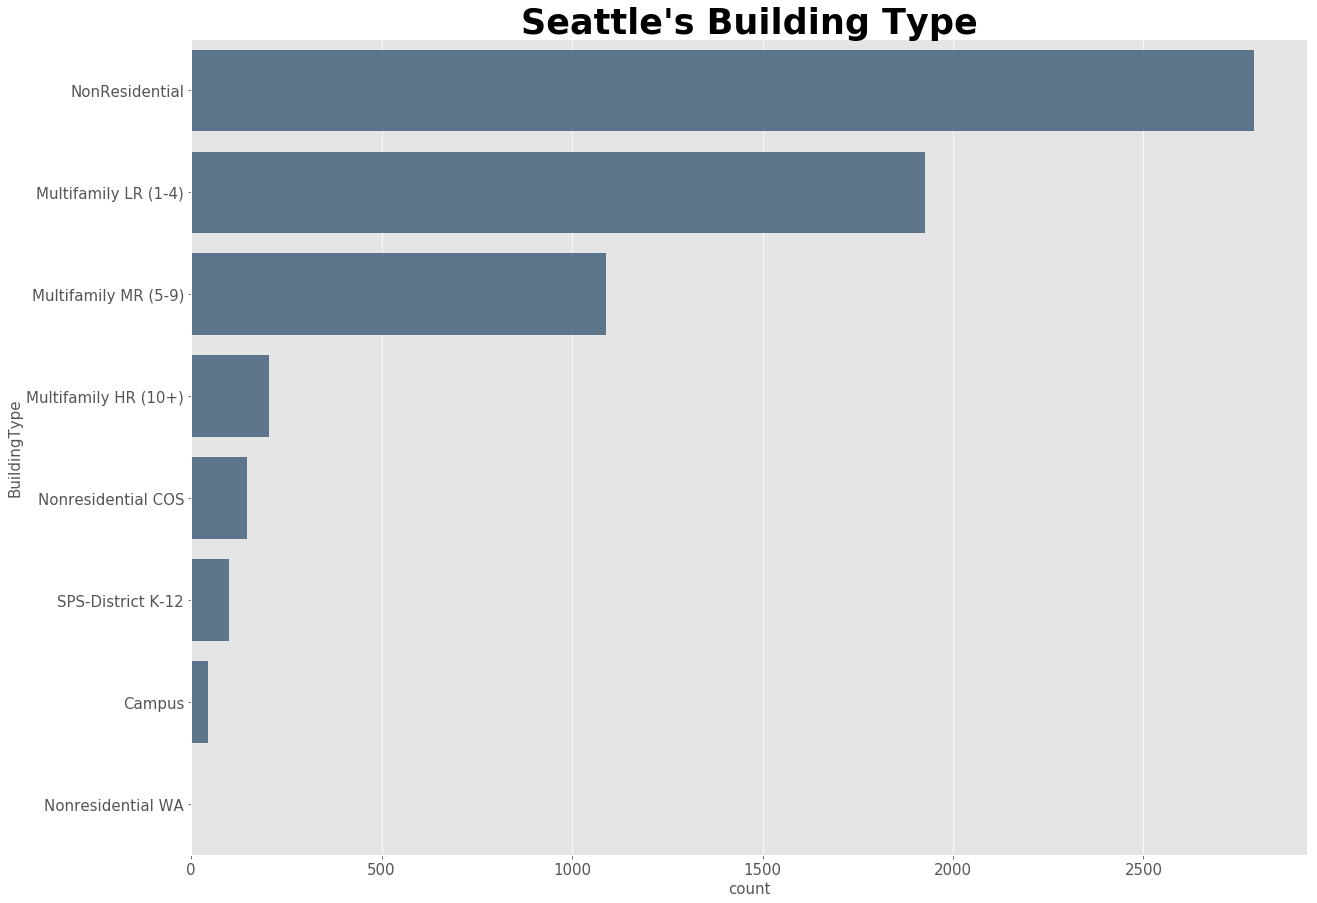

In [55]:
#BuildingType
ax, fig = plt.subplots(figsize=(20,15)) 
ax = sns.countplot(data=df, y='BuildingType', color="#315a7d", alpha=.8,
              order=df['BuildingType'].value_counts().index, orient='horizontal')
ax.set_title("Seattle's Building Type")
plt.savefig('p4_00_graphic/buildingtype_hist.png')
plt.show()

**Quels sont ces bâtiments à Seattle?** Une grande majorité est destinée à un usage privé representé par la mention "Multifamily", ainsi que pour un usage destiné à des activités professionnelles comme l'atteste la mention "NonResidential".

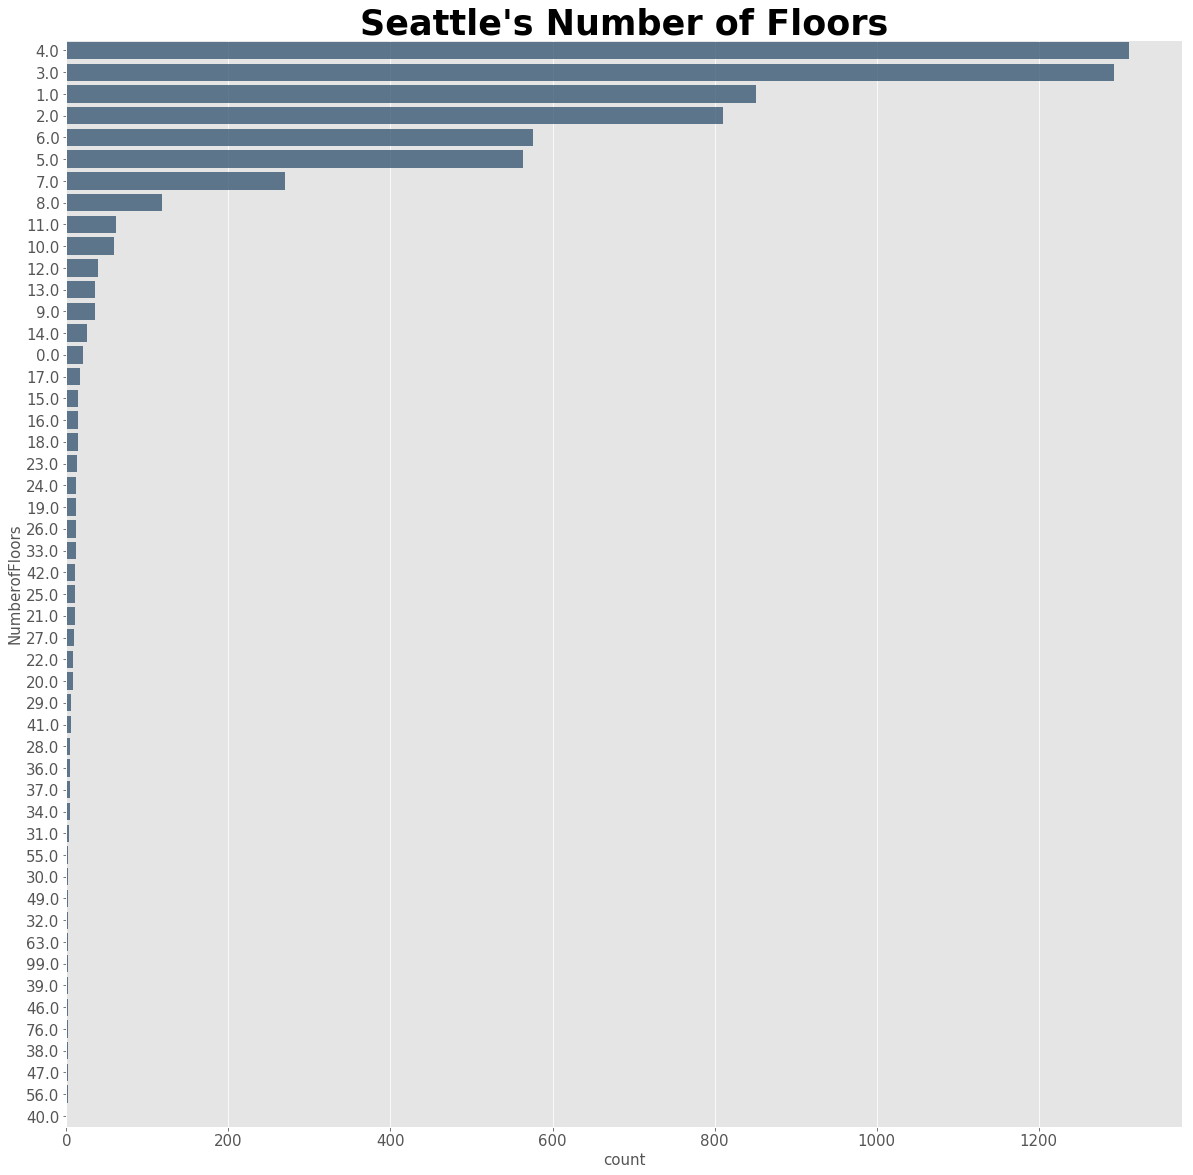

In [56]:
#NumberofFloors
ax, fig = plt.subplots(figsize=(20,20)) 
ax = sns.countplot(data=df, y='NumberofFloors', color="#315a7d", alpha=.8,
              order=df['NumberofFloors'].value_counts().index, orient='horizontal')
ax.set_title("Seattle's Number of Floors")
plt.show()

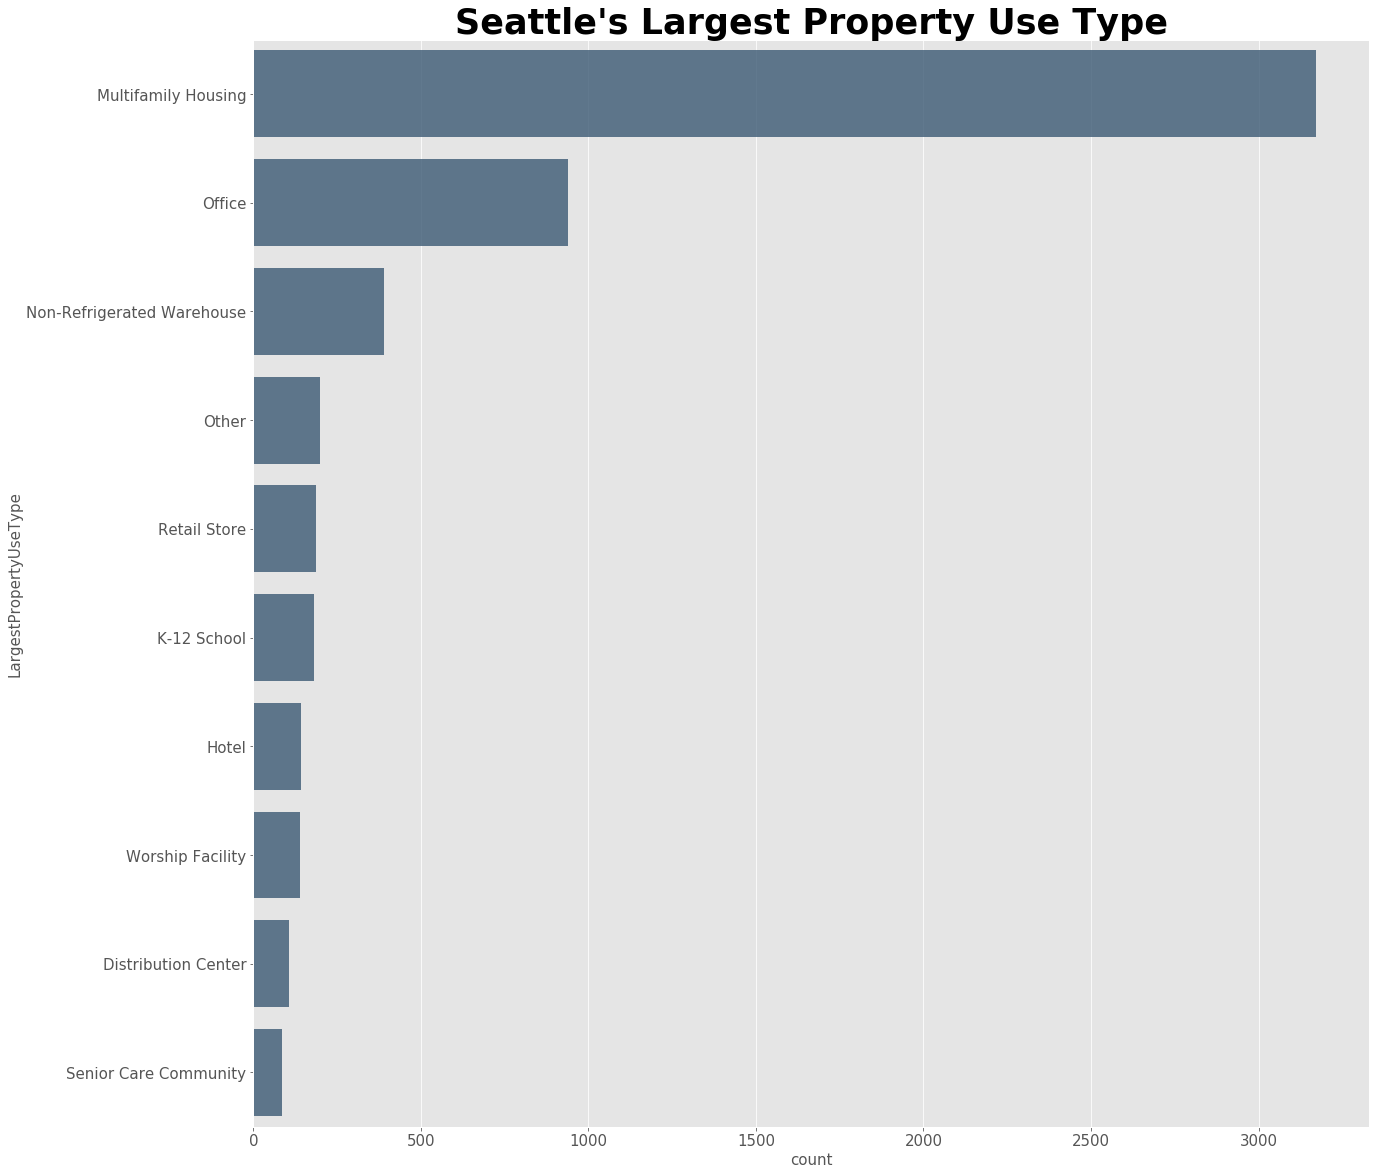

In [57]:
ax, fig = plt.subplots(figsize=(20,20)) 
ax = sns.countplot(data=df, y='LargestPropertyUseType', color="#315a7d", alpha=.8,
              order=(df['LargestPropertyUseType'].value_counts())[:10].index, orient='horizontal')


ax.set_title("Seattle's Largest Property Use Type")
plt.show()

Le secteur du Multifamilial et du bureau représente la majorité des types de bâtiments de la ville de Seatlle.\
**Ceci étant, sont-ils également les plus représentatifs en terme de consommation énergétique?**

In [58]:
df.groupby('LargestPropertyUseType')['SiteEnergyUse(kBtu)'].sum().sort_values(ascending=False)[:20]

LargestPropertyUseType
Office                                   7.791692e+09
Multifamily Housing                      7.189946e+09
Hospital (General Medical & Surgical)    2.641642e+09
Other                                    2.031983e+09
Hotel                                    1.792230e+09
College/University                       1.682873e+09
Medical Office                           9.977860e+08
Retail Store                             9.359116e+08
Parking                                  9.018372e+08
Senior Care Community                    7.708317e+08
Supermarket/Grocery Store                7.363250e+08
Non-Refrigerated Warehouse               7.186989e+08
Data Center                              6.638482e+08
Laboratory                               6.000359e+08
K-12 School                              5.400952e+08
Other - Entertainment/Public Assembly    5.346196e+08
Other - Recreation                       2.779205e+08
Distribution Center                      2.480472e+08
Urgen

Ces deux secteurs consomment le plus d'énergie, avec beaucoup d'autres usages que l'on peut imaginer en "Others", et suivi de très près par le secteur de l'hôtellerie et de la distribution.

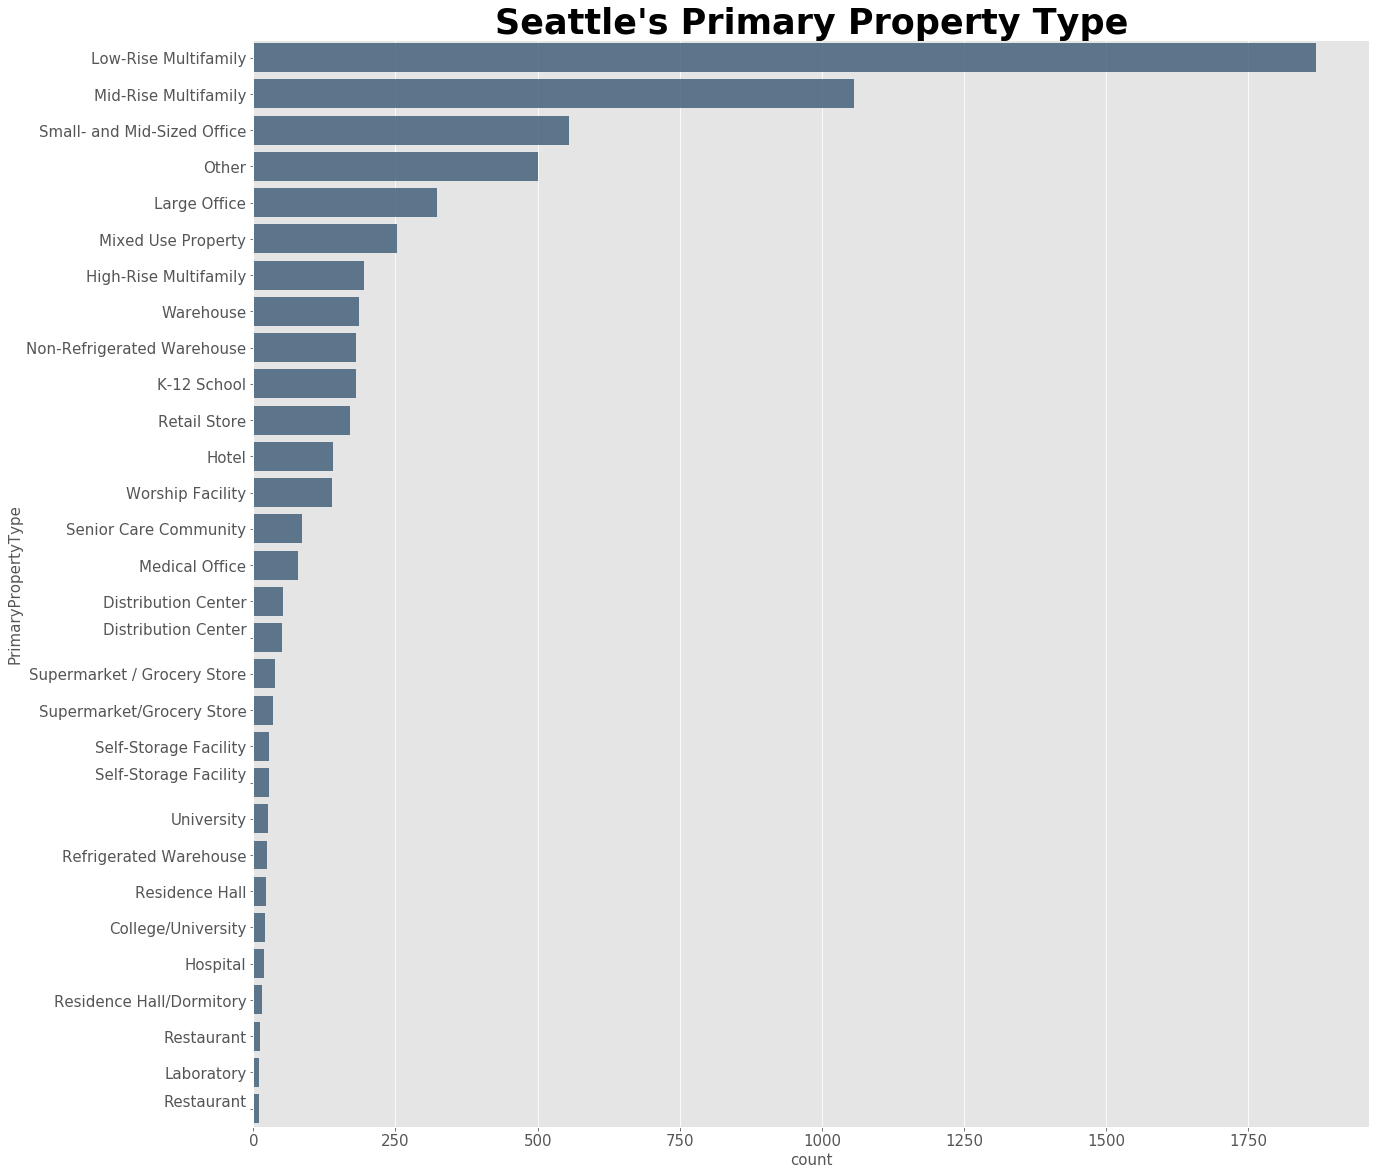

In [62]:
ax, fig = plt.subplots(figsize=(20,20)) 
ax = sns.countplot(data=df, y='PrimaryPropertyType', color="#315a7d", alpha=.8,
              order=df['PrimaryPropertyType'].value_counts().index, orient='horizontal')
ax.set_title("Seattle's Primary Property Type")
plt.show()

Comme cela a été dit sur le premier histogramme, l'usage est majoritairement privé, suivi par des professionnels comme des bureaux, hôtels, distributeurs, etc…

In [63]:
nota = pd.DataFrame(round(df['LargestPropertyUseType'].value_counts()/df['LargestPropertyUseType']
                   .shape[0]*100, 1))[:10].rename(columns={'LargestPropertyUseType':'%Type'}).reset_index()
nota

,index,%Type
0,Multifamily Housing,50.3
1,Office,14.9
2,Non-Refrigerated Warehouse,6.2
3,Other,3.2
4,Retail Store,3.0
5,K-12 School,2.9
6,Hotel,2.3
7,Worship Facility,2.2
8,Distribution Center,1.7
9,Senior Care Community,1.4


**Avons-nous la possibilité d'avoir une vision temporelle des principaux usages immobiliers de la ville de Seattle?**\
L'échantillon permet de visualiser la progression des usages immobiliers… Voyons comment cela évolue.

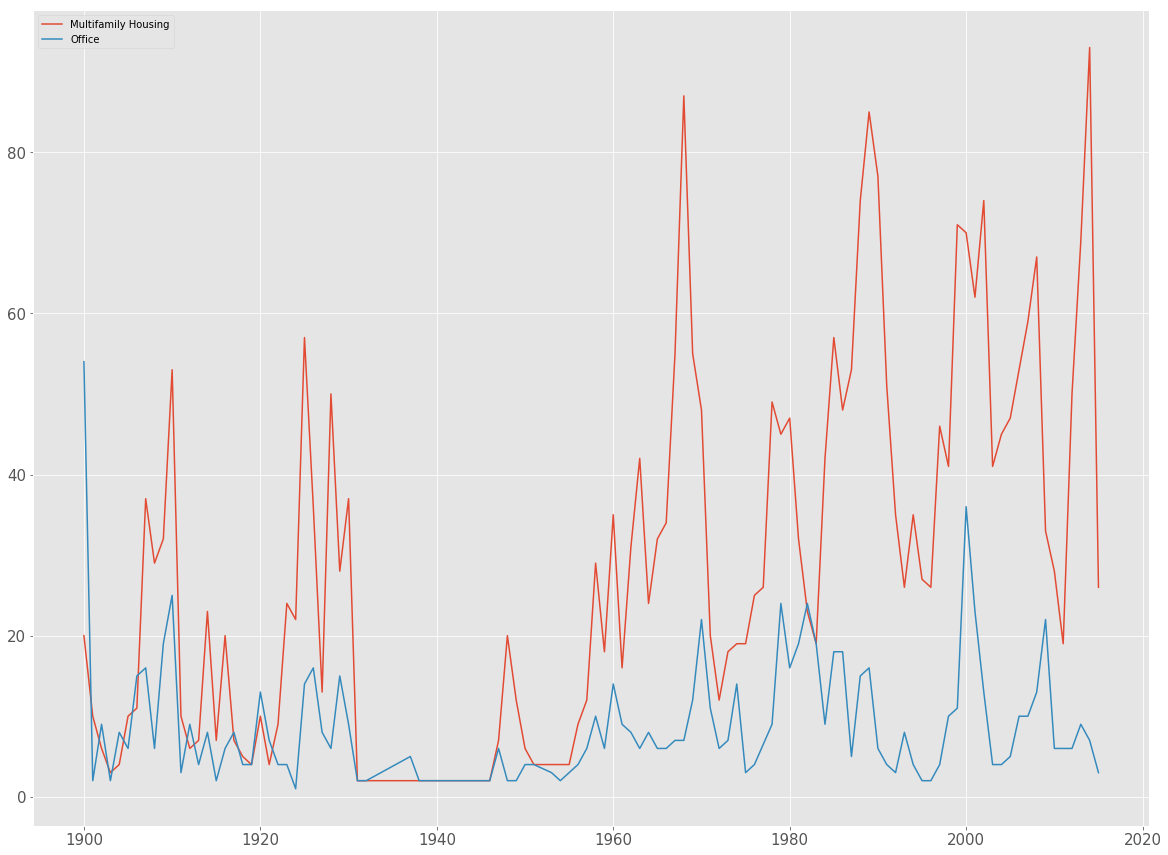

In [64]:
plt.figure(figsize=(20, 15))
plt.plot(df[df['LargestPropertyUseType'] == 'Multifamily Housing'][['LargestPropertyUseType', 'YearBuilt']]\
.groupby('YearBuilt').count(), label='Multifamily Housing')
plt.plot(df[df['LargestPropertyUseType'] == 'Office'][['LargestPropertyUseType', 'YearBuilt']]\
.groupby('YearBuilt').count(), label='Office')

plt.legend()
plt.show()

Une approche par zone géographique est également possible. **Avons-nous des zones, des secteurs plus denses que d'autres en termes de Buildings?**

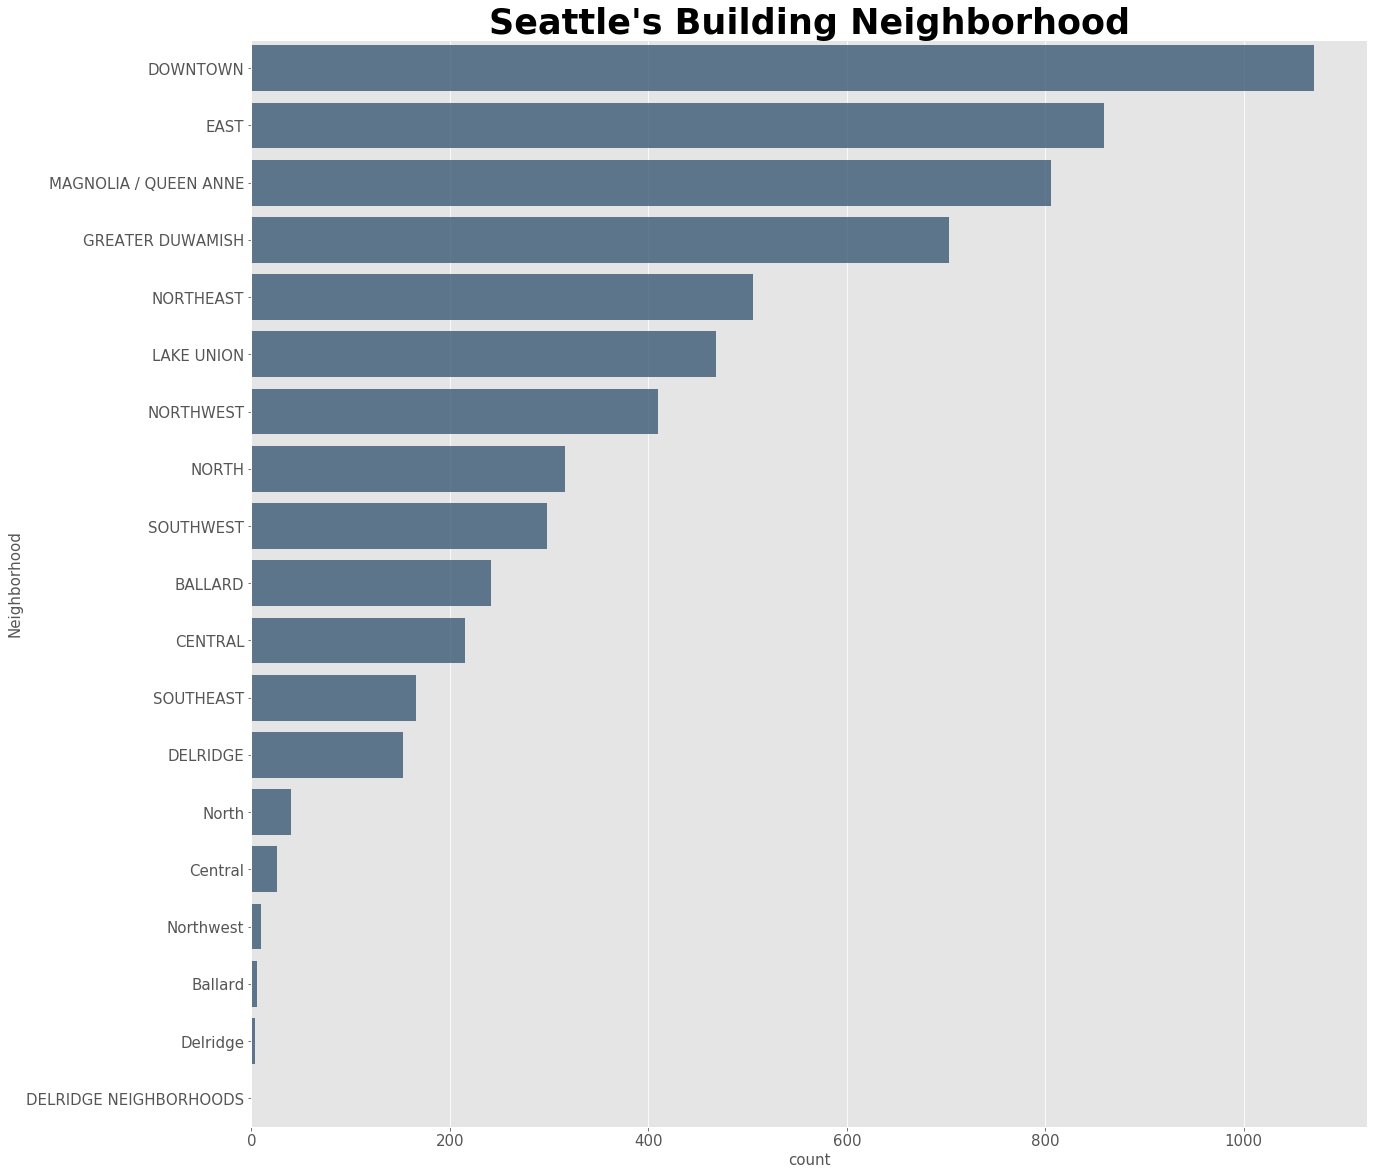

In [65]:
ax, fig = plt.subplots(figsize=(20,20)) 
ax = sns.countplot(data=df, y='Neighborhood', color="#315a7d", alpha=.8,
              order=df['Neighborhood'].value_counts().index, orient='horizontal')
ax.set_title("Seattle's Building Neighborhood")
plt.show()

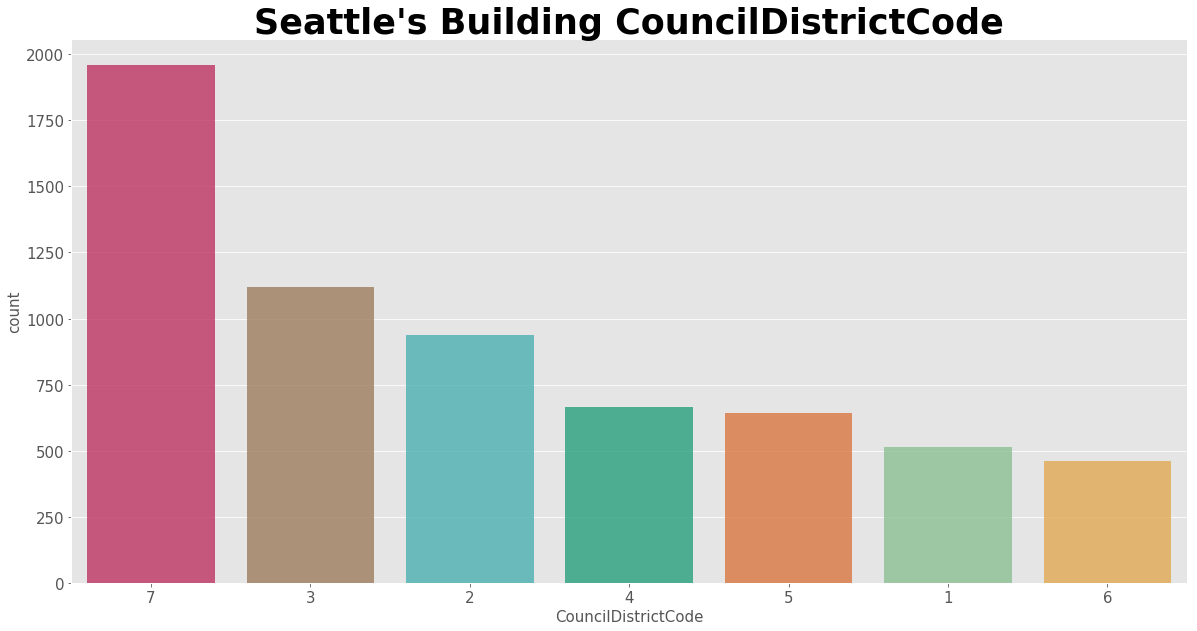

In [66]:
#CouncilDistrictCode
ax, fig = plt.subplots(figsize=(20,10)) 
code_colors = {7:'#d41c5c', 3:'#a77c52', 2:'#3cc0c2', 4:'#13b383', 5:'#f36f25', 1:'#82c88c', 6:'#f8af3c'}
ax = sns.countplot(data=df, x='CouncilDistrictCode', palette=code_colors, alpha=.8,
                   order=list(df['CouncilDistrictCode'].value_counts().index))
ax.set_title("Seattle's Building CouncilDistrictCode")
plt.show()

![Council District](p4_image/council_district_code.jpg)

*Source: www.seattle.gov*

## Analyse bivariée des variables
Après une première approche analytique et visuelle des principales variables. Avons-nous des relations entre variables et sont-elles exploitables? Voyons comment rechercher des corrélations, comment les analyser, etc… dans l'objectif de pouvoir sélectionner les variables les plus pertinentes, les plus explicatives pour les modélisations. **Ici on cherche à consolider l'échantillon en vue de faciliter et d'optimiser la phase de features engineering.**

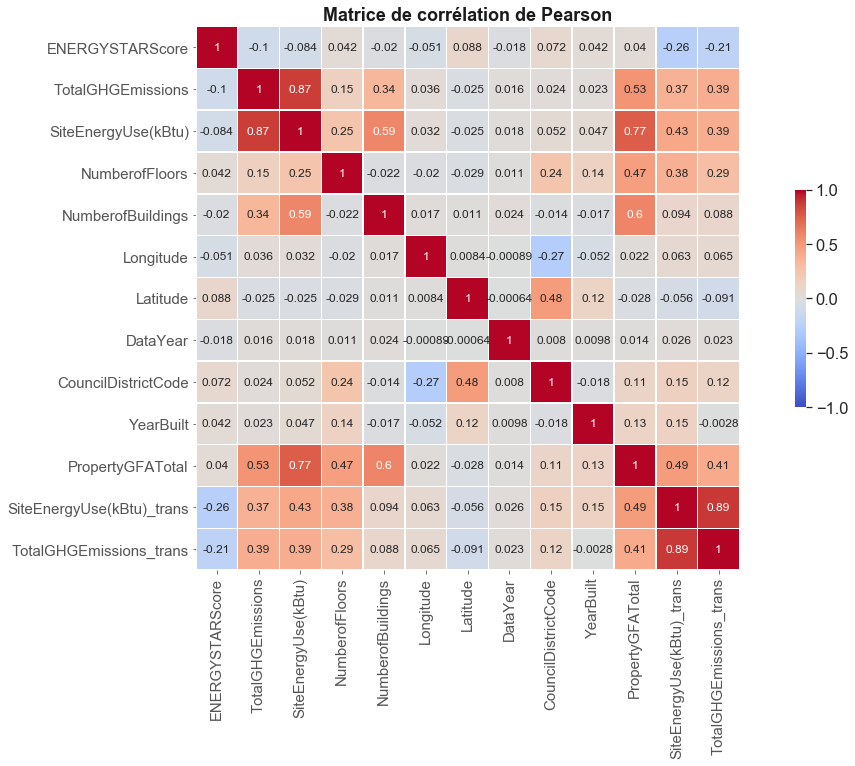

In [67]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(df.corr(),
                     # mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_title('Matrice de corrélation de Pearson')
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.savefig('p4_00_graphic/correlation_matrice.png')

Des corrélations linéaires existent entre certaines variables. Ces observations sont visibles à partir de la colorimétrie ci-dessus. Ici, on vient vérifier certaines de nos intuitions, comme par exemple la relation entre la surface et la consommation, etc…

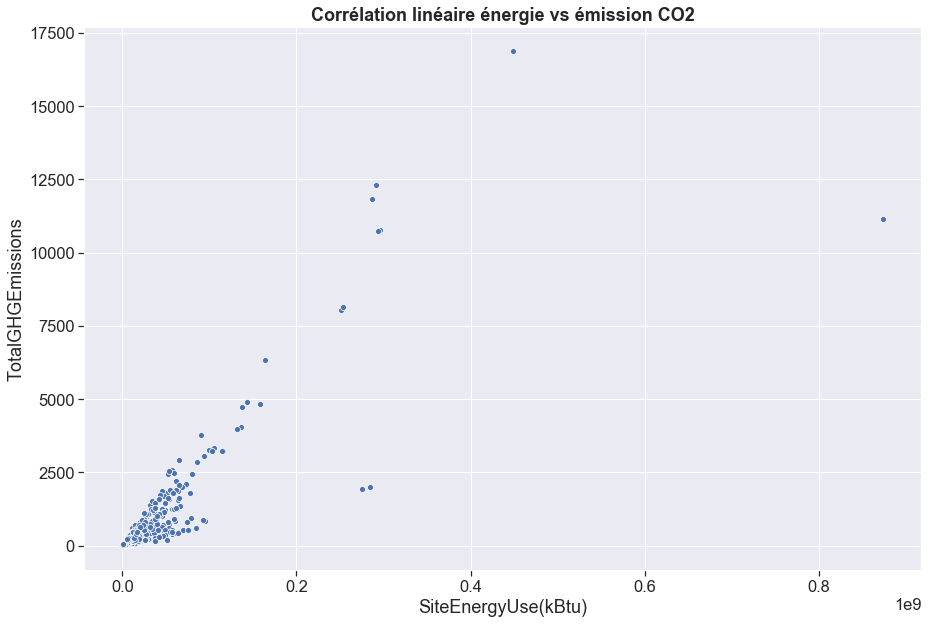

In [68]:
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=df, )
plt.title("Corrélation linéaire énergie vs émission CO2")
plt.savefig('p4_00_graphic/energy_emissions_plot.png')
plt.show()

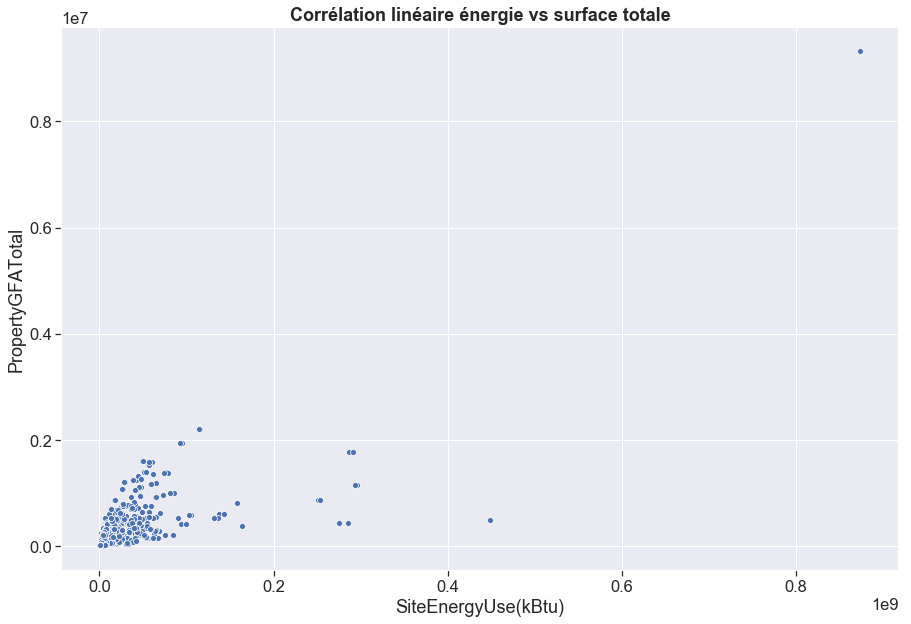

In [69]:
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='PropertyGFATotal', data=df, )
plt.title("Corrélation linéaire énergie vs surface totale")
plt.savefig('p4_00_graphic/energy_gfa_plot.png')
plt.show()

Notons que la représentation graphique atteste de la corrélation linéaire des deux variables cibles sur les émissions de CO2 et la consommation énergétique totale des bâtiments de Seattle. Le coef. de Pearson 0.87 est également significatif.\
**Voyons quelques comportements entre nos variables cibles et des caractéristiques liées aux bâtiments.**

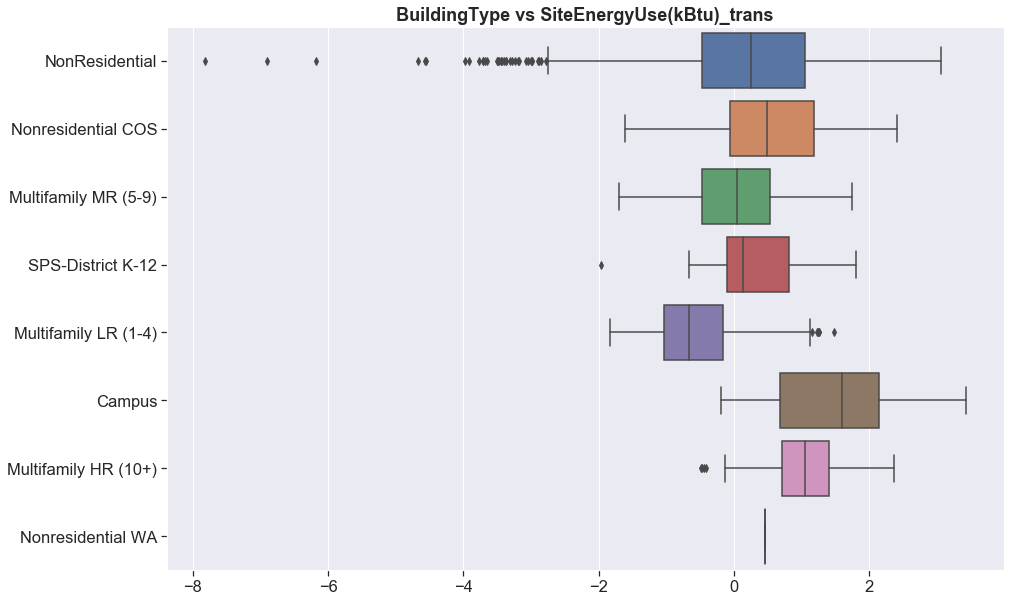

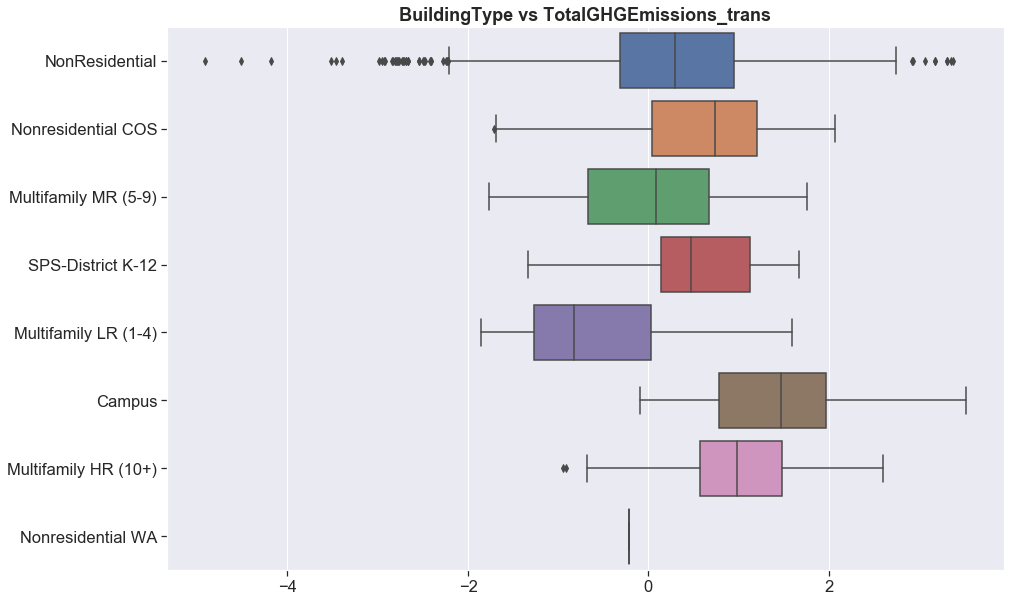

In [70]:
#BuildingType VS numerical_target
for target in df[numerical_target] : 
    sns.boxplot(x=target, y='BuildingType', data=df)
    plt.title('BuildingType vs ' + target)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

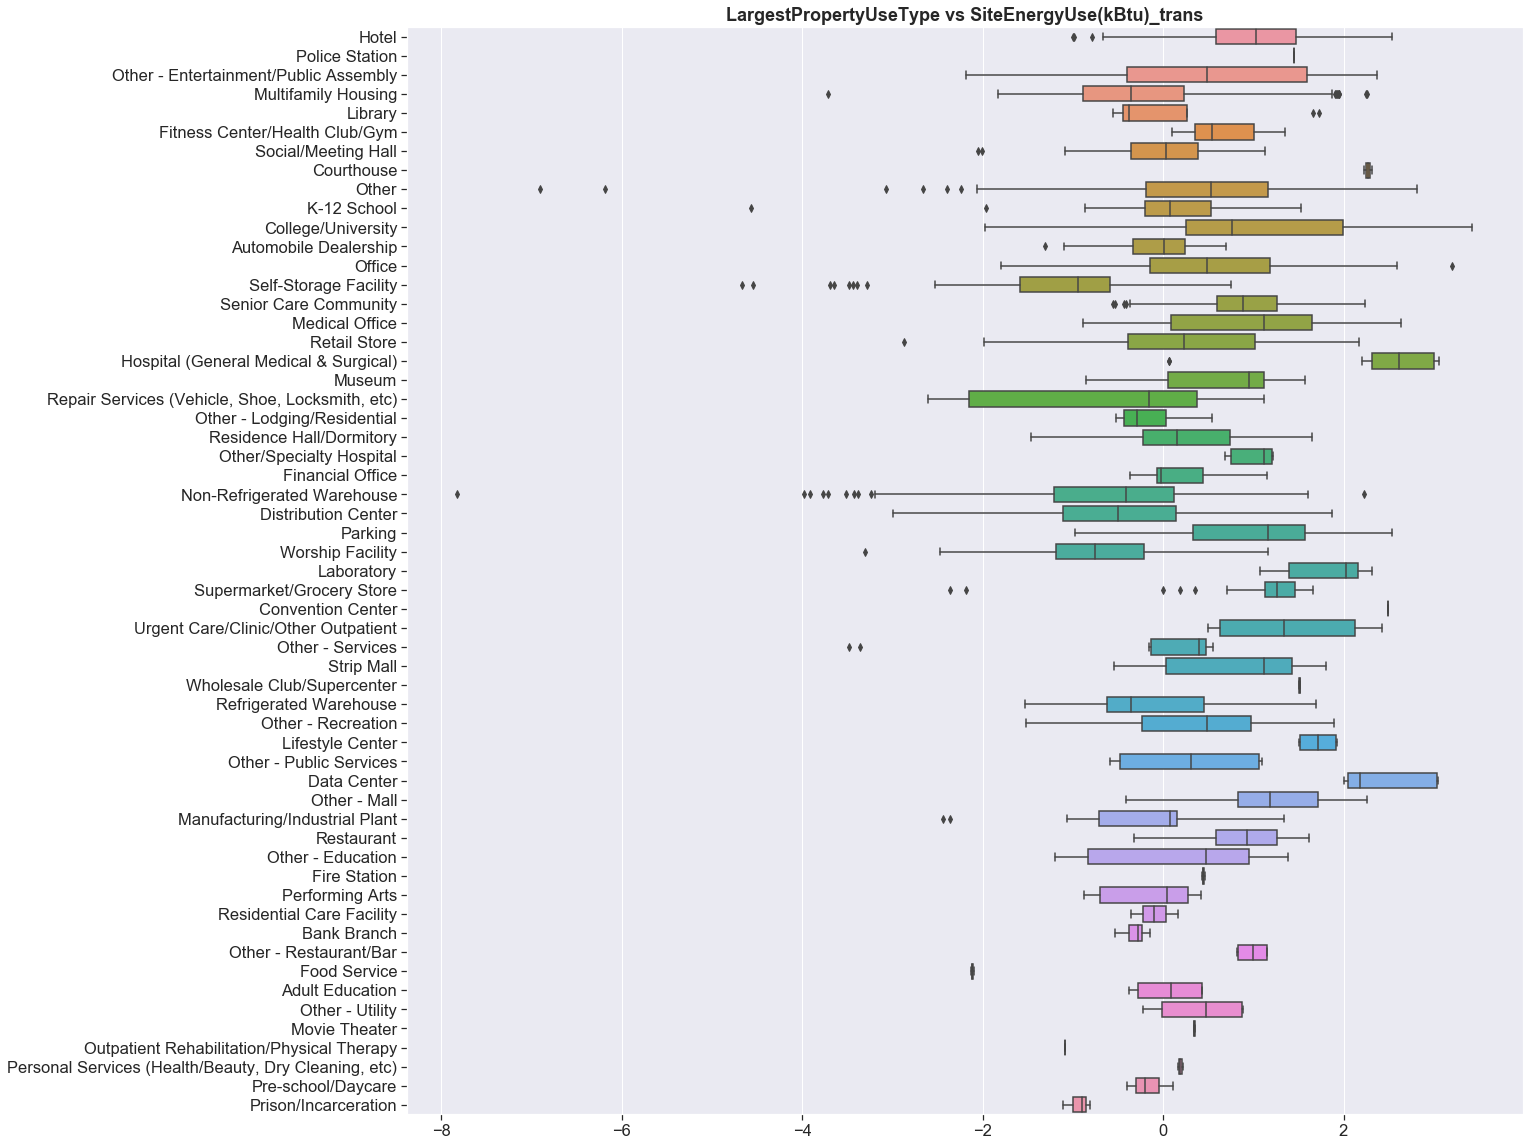

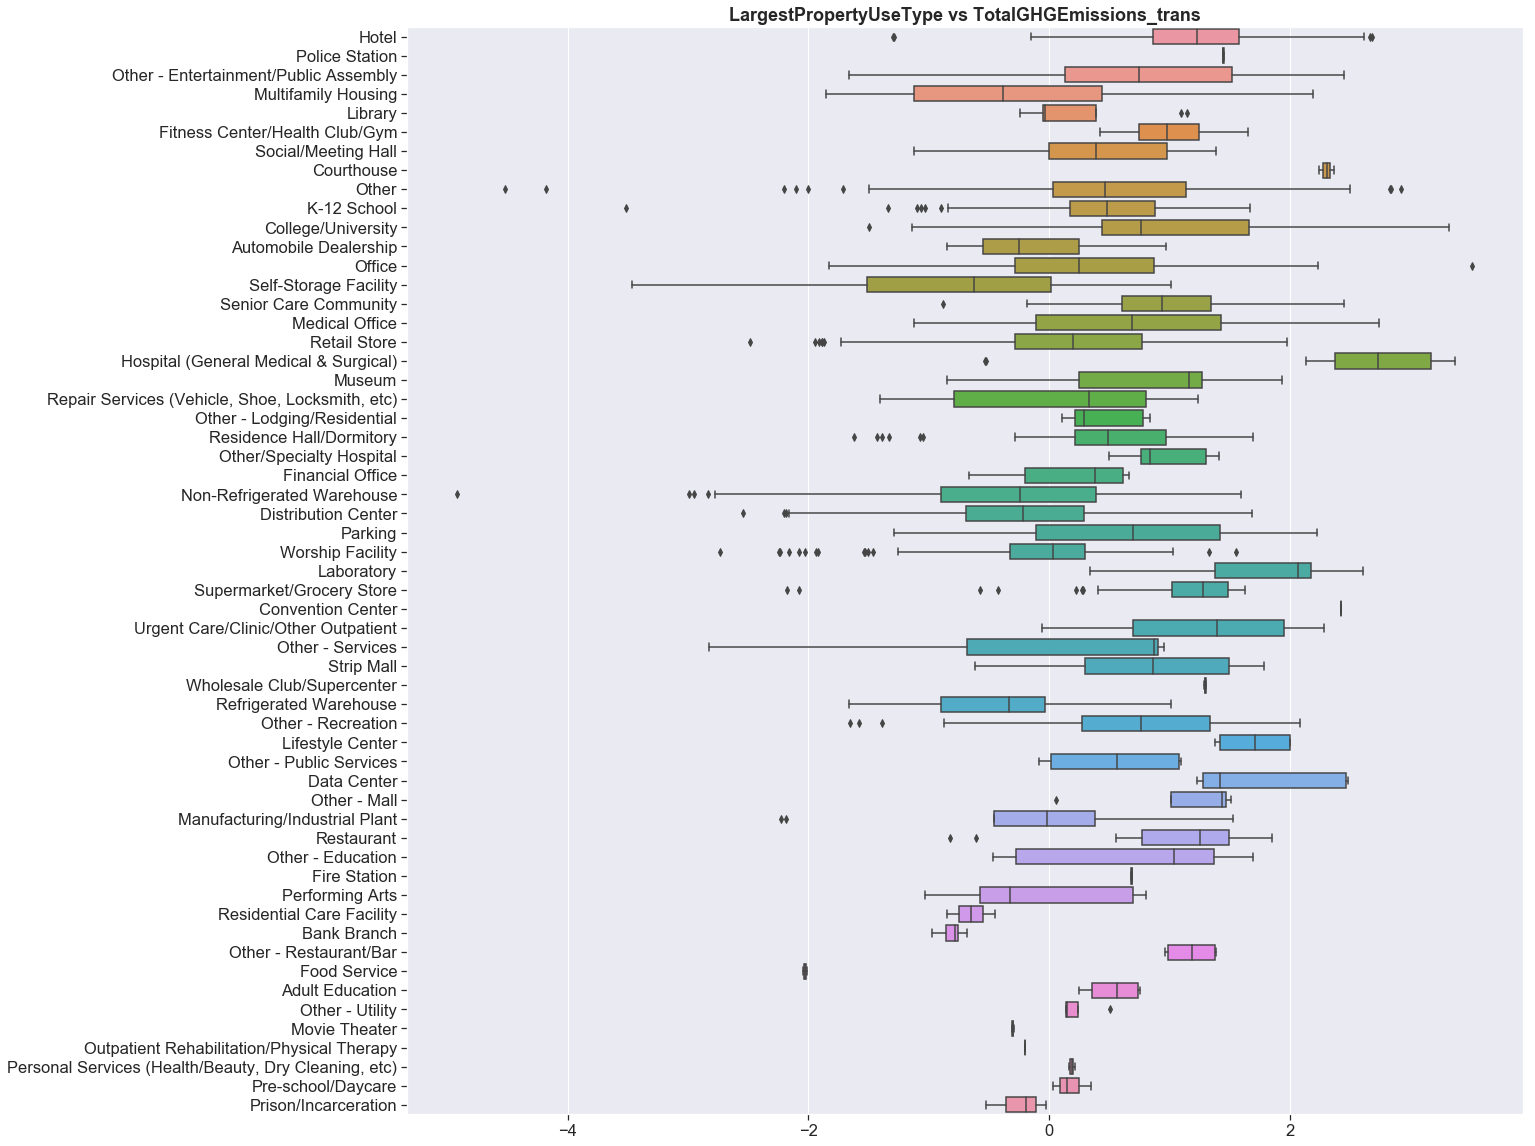

In [71]:
#LargestPropertyUseType VS numerical_target
for target in df[numerical_target] : 
    plt.figure(figsize=(20, 20))
    sns.boxplot(x=target, y='LargestPropertyUseType', data=df)
    plt.title('LargestPropertyUseType vs ' + target)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Certaines structures professsionnelles commes les hôpitaux, data center, parking ou encore les hôtels sont plus représentatifs d'une consommation énergétique élevée, donc de rejets de CO2 plus importants.

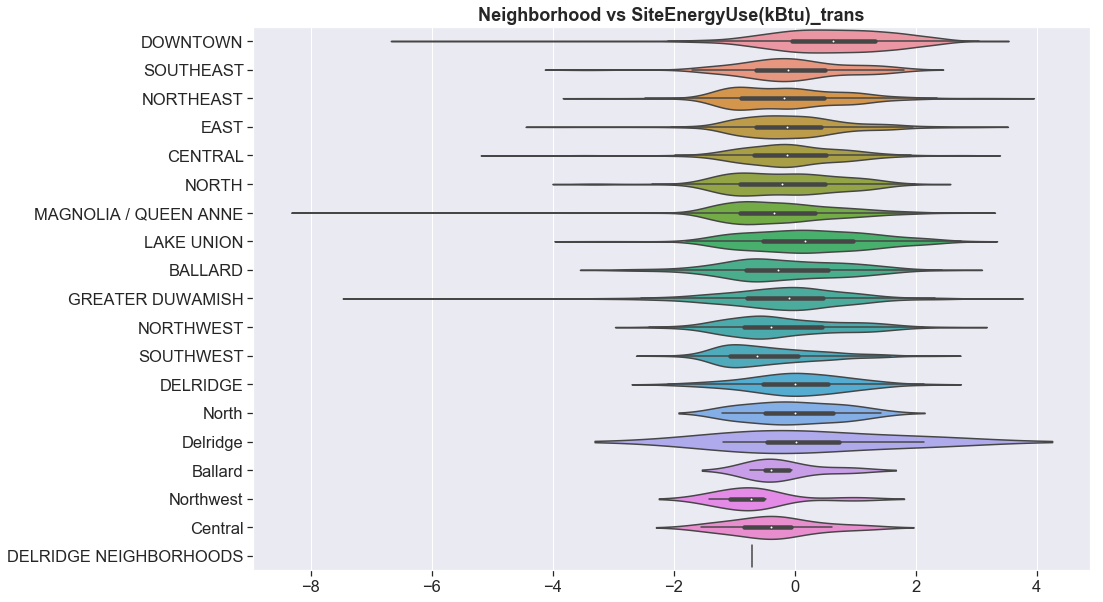

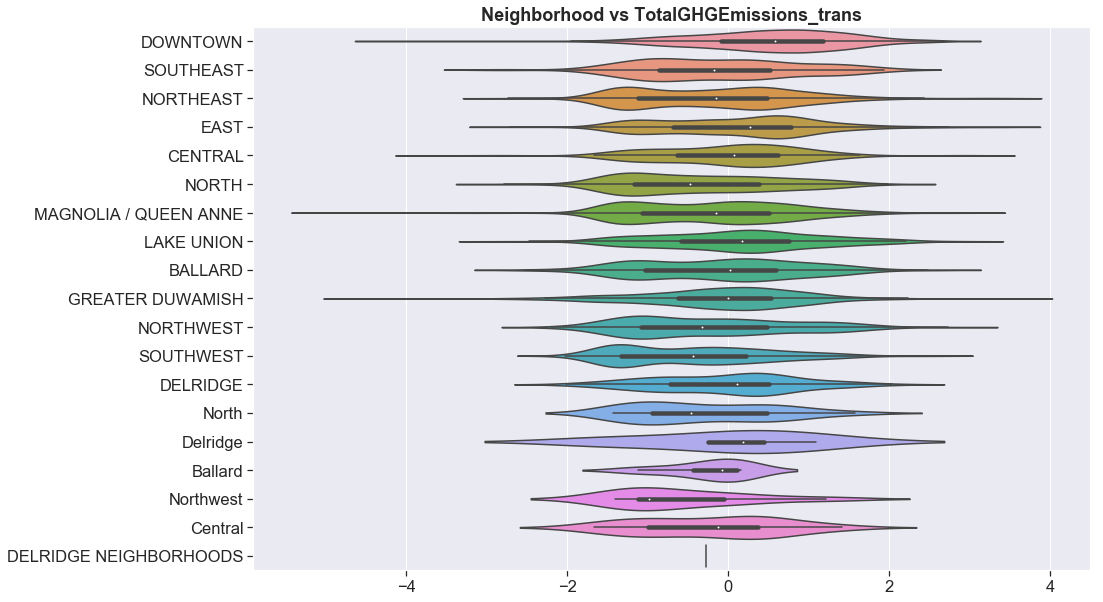

In [72]:
#Violin Plot Neighborhood VS numerical_target
for target in df[numerical_target] : 
    sns.violinplot(x=target, y='Neighborhood', data=df, scale='width')
    plt.title('Neighborhood vs ' + target)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Quelques zones géographiques de la ville de Seattle ressortent, ce qui peut s'expliquer par l'implantation de structures importantes comme celles évoquées précédemment (hôpitaux, data center…)

In [73]:
df.to_csv('p4_00_data/df.csv', sep=';', encoding='utf-8')

Ici, on a pu apprendre de nos variables afin de sélectionner celles qui sont les plus explicatives selon une logique métier. Le nettoyage a été opéré, avec traitement des valeurs manquantes, traitement des valeurs outliers dont les principales atypiques ont été conservées dans l'échantillon, les duplications ont également été analysées. Des intuitions de relation linéaire entre variables ont pu être visualisées, mais également les relations entre les targets et des variables catégorielles.

Dans le prochain Notebook sera traité la phase de modélisation, avec du features engineering, tests des performances sur plusieurs algorithmes, optimisation des hyperparamètres et sélection de la modélisation la plus performante, la plus robuste, en adéquation avec l'objectif recherché.